# Data analysis
En este notebook se procedera con la exploracion de los datos, obtenidos al clasificar los articulos obtenidos (n=99) en las tablas que se encuentran en la carpeta /data. Primero se procede con el seteo del work directory, el importado de las librerias y funciones a usar, y la creacion de los dataframes para el analisis exploratorio de los datos.

## Primary stepts

Import libraries and functions

In [1]:
#Import libraries to be used
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import zepid
from zepid.graphics import EffectMeasurePlot
import networkx as nx
from numpy import genfromtxt
from scipy import stats
from IPython.display import Image
from thefuzz import fuzz
import os

c:\Users\someo\AppData\Local\Programs\Python\Python311\Lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Reseteo del directorio principal
os.getcwd()
os.chdir("C:\\Users\someo\Downloads\\review-emotion-recognition-eda")

In [3]:
#Import functions to be used
from scripts import functions as fn

Dataframes´s creation

In [4]:
#dataframes to be used, one for every sheet
df_metadata = pd.read_csv('.\data\cleaned\\Normalized Table - Metadata.csv')
df_data_type = pd.read_csv('.\data\cleaned\\Normalized Table - Data type.csv')
df_participants = pd.read_csv('.\data\cleaned\\Normalized Table - Participants.csv')
df_self_report = pd.read_csv('.\data\cleaned\\Normalized Table - Self-report.csv')
df_eet = pd.read_csv('.\data\cleaned\\Normalized Table - Emotion elicitation techniques.csv')
df_eda = pd.read_csv('.\data\cleaned\\Normalized Table - EDA.csv')
df_alg_perf = pd.read_csv('.\data\cleaned\\Normalized Table - Statistical learning model - Performances.csv')

Set default plots caracteristiccs

In [5]:
sns.set_context('notebook')

## Analysis
Teniendo en cuenta las supracategorias () con las que fueron clasificados los articulos, se procede con el analisis de las mismas en orden.

### 1. Metadata

In [6]:
df_metadata=df_metadata.fillna('-')
df_metadata_without_duplicates = df_metadata.drop_duplicates(subset='paper_id')

#### 1.1. Countries

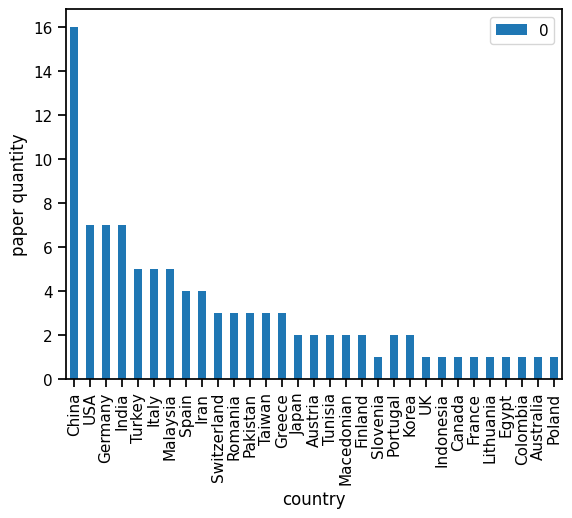

  continents  quantity
0       Asia        49
1     Europa        39
2    America         9
3     Africa         3
4  Australia         1


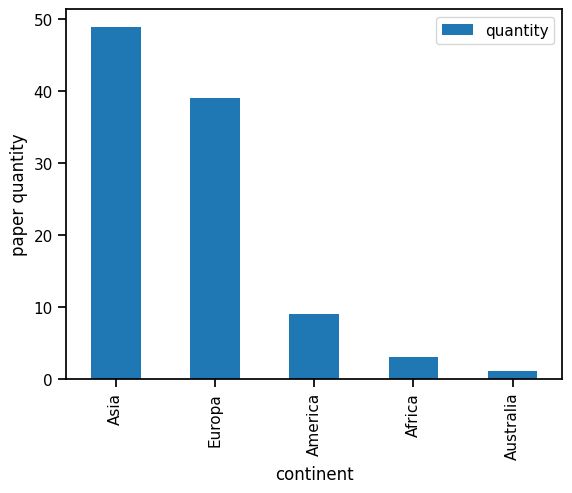

In [7]:
countries_1 = df_metadata_without_duplicates["first_author_country_affiliation"].unique()

countries = df_metadata_without_duplicates.pivot_table(columns=['first_author_country_affiliation'], aggfunc='size')
df_countries = pd.DataFrame(countries)

order = ['China','USA', 'Germany', 'India','Turkey','Italy', 'Malaysia','Spain','Iran', 'Switzerland','Romania','Pakistan', 'Taiwan','Greece', 'Japan',
'Austria', 'Tunisia','Macedonian', 'Finland', 'Slovenia', 'Portugal', 'Korea',
'UK', 'Indonesia','Canada', 'France', 'Lithuania','Egypt','Colombia', 'Australia', 'Poland']

df_countries.loc[order].plot(kind='bar', xlabel='country', ylabel='paper quantity')
plt.show()

#Papers por continente - plot
papers_continents = {'continents' : ['Asia', 'Europa','America','Africa','Australia'],
'quantity' : [49, 39, 9, 3, 1]}
df_continents = pd.DataFrame(papers_continents)
print(df_continents)

df_continents.set_index('continents').plot(kind='bar',xlabel='continent', ylabel='paper quantity')
plt.show()

In [8]:
df_metadata_without_duplicates["first_author_country_affiliation"]

0        Spain
1        China
2       Turkey
4      Austria
9        China
        ...   
480     Taiwan
490     Poland
491      India
493      India
497    Germany
Name: first_author_country_affiliation, Length: 99, dtype: object

In [9]:
#Aquellos que tenian una frecuencia de 4 o menos los agrupamos en 'Others'
mapping_others ={
        
        'Australia': 'WEIRD',
        'Austria': 'WEIRD',
        'Canada': 'WEIRD',
        'Finland': 'WEIRD',
        'France': 'WEIRD',
        'Germany': 'WEIRD',
        'Italy': 'WEIRD',
        'Lithuania': 'WEIRD',
        'Poland': 'WEIRD',
        'Portugal': 'WEIRD',
        'Slovenia': 'WEIRD',
        'Spain': 'WEIRD',
        'Switzerland': 'WEIRD',
        'UK': 'WEIRD',
        'USA': 'WEIRD'}

df_countries_with_weird = df_metadata_without_duplicates.copy()
df_countries_with_weird.loc[:,'first_author_country_affiliation'] = df_countries_with_weird.loc[:,"first_author_country_affiliation"].replace(mapping_others)
df_countries_with_weird["first_author_country_affiliation"].value_counts()

WEIRD         39
China         16
India          7
Turkey         5
Malaysia       5
Iran           4
Pakistan       3
Taiwan         3
Romania        3
Greece         3
Japan          2
Macedonian     2
Korea          2
Tunisia        2
Egypt          1
Indonesia      1
Colombia       1
Name: first_author_country_affiliation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'WEIRD'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Turkey'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Malaysia'),
  Text(5, 0, 'Indonesia'),
  Text(6, 0, 'Tunisia'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Macedonian'),
  Text(9, 0, 'Romania'),
  Text(10, 0, 'Greece'),
  Text(11, 0, 'Korea'),
  Text(12, 0, 'Pakistan'),
  Text(13, 0, 'Egypt'),
  Text(14, 0, 'Taiwan'),
  Text(15, 0, 'Japan'),
  Text(16, 0, 'Colombia')])

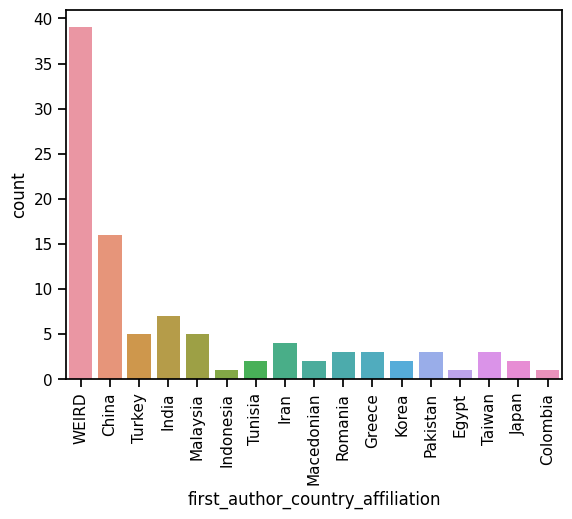

In [10]:
sns.countplot(x="first_author_country_affiliation", data=df_countries_with_weird)
plt.xticks(rotation=90)

#### 1.2. Source type

<AxesSubplot: xlabel='Source type', ylabel='count'>

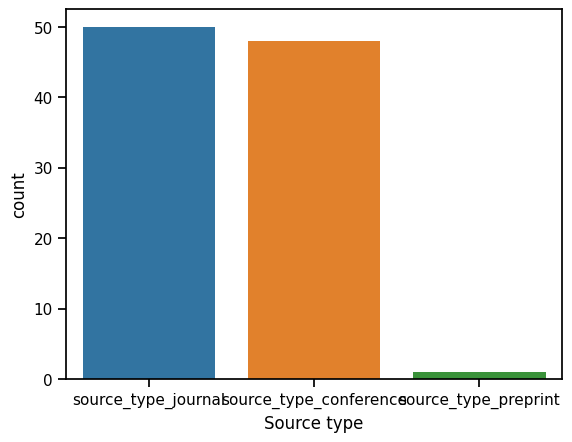

In [11]:
df_sources = df_metadata_without_duplicates.iloc[:,7:10]
def get_value(row):
     for c in df_sources.columns:
         if row[c]== 'x':
             return c

df_sources = df_sources.apply(get_value, axis=1)
df_sources = pd.DataFrame(df_sources)
df_sources.columns = ['Source type']

#ploteo
quantity = df_sources['Source type'].value_counts()
df_quantity = pd.DataFrame(quantity)


sns.countplot(x='Source type', data=df_sources)

In [12]:
df_quantity

,Source type
source_type_journal,50
source_type_conference,48
source_type_preprint,1


#### ¿De que revistas cientificas provinieron la mayoria de los papers? ¿Cual era su orientacion (psicologica o ingenieria de datos)?
7. Gráfico frecuencia de papers según revista científica de origen, distinguiendo entre las que poseen orientación en ingeniería de datos y las que no

Nota: falta filtrar bien cuales son journal, y cuales de estas son de ingenieria o no (diferenciarlas con color o hue)

C:\Users\someo\Downloads\review-emotion-recognition-eda\scripts\functions.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


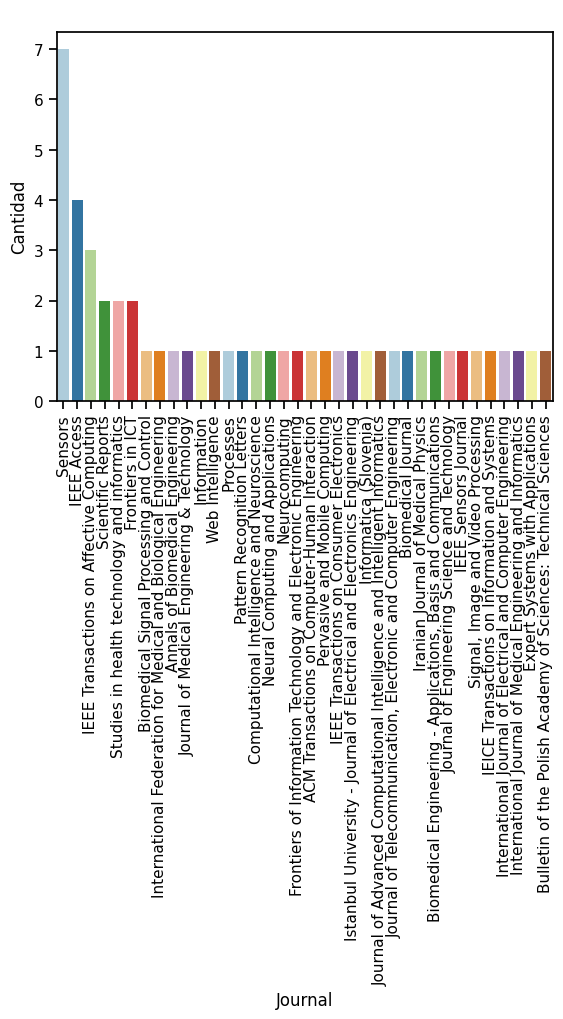

In [13]:
#por revista
df_metadata=df_metadata.fillna('-')
df_metadata_without_duplicates = df_metadata.drop_duplicates(subset='paper_id')

df_source_title = df_metadata_without_duplicates[['paper_id','source_title','source_type_journal']]
df_source_title = df_source_title[df_source_title['source_type_journal'].isin(['x', 'X'])] 

titulos = [' ', 'Journal', 'Cantidad']
fn.bar_plot('source_title',df_source_title,titulos)

In [14]:
df_source_title["source_title"].value_counts()

Sensors                                                                       7
IEEE Access                                                                   4
IEEE Transactions on Affective Computing                                      3
Scientific Reports                                                            2
Studies in health technology and informatics                                  2
Frontiers in ICT                                                              2
Biomedical Signal Processing and Control                                      1
International Federation for Medical and Biological Engineering               1
Annals of Biomedical Engineering                                              1
Journal of Medical Engineering & Technology                                   1
Information                                                                   1
Web Intelligence                                                              1
Processes                               

In [15]:
df_source_title["source_title"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Sensors                                                                       14.0%
IEEE Access                                                                    8.0%
IEEE Transactions on Affective Computing                                       6.0%
Scientific Reports                                                             4.0%
Studies in health technology and informatics                                   4.0%
Frontiers in ICT                                                               4.0%
Biomedical Signal Processing and Control                                       2.0%
International Federation for Medical and Biological Engineering                2.0%
Annals of Biomedical Engineering                                               2.0%
Journal of Medical Engineering & Technology                                    2.0%
Information                                                                    2.0%
Web Intelligence                                                            

In [16]:
serie_sources = df_source_title["source_title"].value_counts()
df_serie_sources = serie_sources.to_frame()
df_serie_sources = df_serie_sources.reset_index()
df_serie_sources.rename(columns = {'index':'algoritmo', 'variable':'cantidad'}, inplace = True)

In [17]:
col1 = df_serie_sources.columns[0]
col2 = df_serie_sources.columns[1]

mapping_others = {}

for i, row in df_serie_sources.iterrows():
    if row[col2] == 1:
        mapping_others.update({row[col1]: "Others (=1)"})

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sensors'),
  Text(1, 0, 'Others (=1)'),
  Text(2, 0, 'Scientific Reports'),
  Text(3, 0, 'Frontiers in ICT'),
  Text(4, 0, 'IEEE Transactions on Affective Computing'),
  Text(5, 0, 'IEEE Access'),
  Text(6, 0, 'Studies in health technology and informatics')])

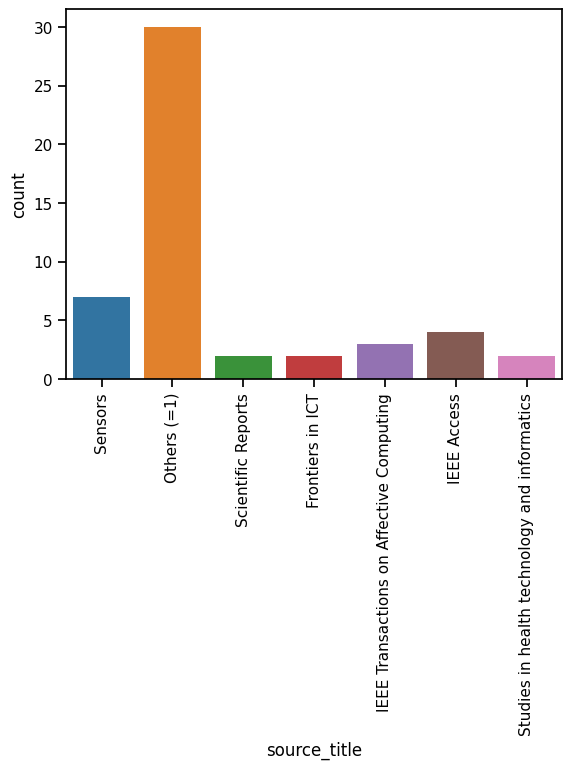

In [18]:
sources_with_others = df_source_title.copy()
sources_with_others.loc[:,'source_title'] = sources_with_others.loc[:,'source_title'].replace(mapping_others)
sources_with_others['source_title'].value_counts()

sns.countplot(x="source_title", data=sources_with_others)
plt.xticks(rotation=90)

In [19]:
sources_with_others["source_title"].value_counts()

Others (=1)                                     30
Sensors                                          7
IEEE Access                                      4
IEEE Transactions on Affective Computing         3
Scientific Reports                               2
Frontiers in ICT                                 2
Studies in health technology and informatics     2
Name: source_title, dtype: int64

In [20]:
sources_with_others["source_title"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Others (=1)                                     60.0%
Sensors                                         14.0%
IEEE Access                                      8.0%
IEEE Transactions on Affective Computing         6.0%
Scientific Reports                               4.0%
Frontiers in ICT                                 4.0%
Studies in health technology and informatics     4.0%
Name: source_title, dtype: object

### 2. Data type

In [21]:
df_data_type = df_data_type.fillna('-')

#### ¿Cual es la evolucion temporal (2010-2020) del uso de las bases de datos privadas y publicas?
5. Gráfico de barra por año (2010-2020) según tipos de base de datos (privada, pública)

In [22]:
df_data_type = df_data_type.groupby(['paper_id', 'db_access']).nth(0)
df_data_type.reset_index(inplace=True)

In [23]:
df_data_type

,paper_id,db_access,model_id,apa_citation,year,public_database,use_multiple_db,db_private,db_public,db_private_and_public,...,driving_workload,liris,sense_emotion,pmemo,hazumi1911,bio_vid_emo_db,dreamer,non_eeg_biosignals_data_set_for_assessment_and_visualization_of_neurological_status,stress_recognition_in_automobile_drivers_data_set,pspm_hra1
0,1,restricted,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",2017,-,-,x,-,-,...,-,-,-,-,-,-,-,-,-,-
1,2,restricted,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",2016,-,-,x,-,-,...,-,-,-,-,-,-,-,-,-,-
2,3,open,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",2018,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,4,open,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",2018,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,5,restricted,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",2016,-,-,x,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,open,482,"Yang, H. C., & Lee, C. C. (2019, September). A...",2020,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
96,96,restricted,492,"Kołodziej, M., Tarnowski, P., Majkowski, A., &...",2020,-,-,x,-,-,...,-,-,-,-,-,-,-,-,-,-
97,97,open,493,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
98,98,open,495,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",2018,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [24]:
df_data_type["db_access"] = df_data_type["db_access"].str.capitalize()
df_data_type = df_data_type.rename(columns={"db_access":"Access"})

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Quantity')]

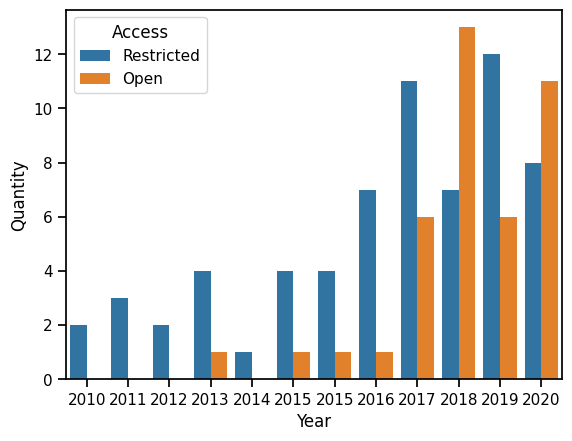

In [25]:
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g = sns.countplot(x='year', 
    data= df_data_type, 
    hue='Access', 
    order=category_order)
g.set(xlabel = 'Year', ylabel = 'Quantity')

In [26]:
df_data_type["Access"].value_counts()

Restricted    61
Open          39
Name: Access, dtype: int64

In [27]:
df_data_type["Access"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Restricted    61.0%
Open          39.0%
Name: Access, dtype: object

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Quantity')]

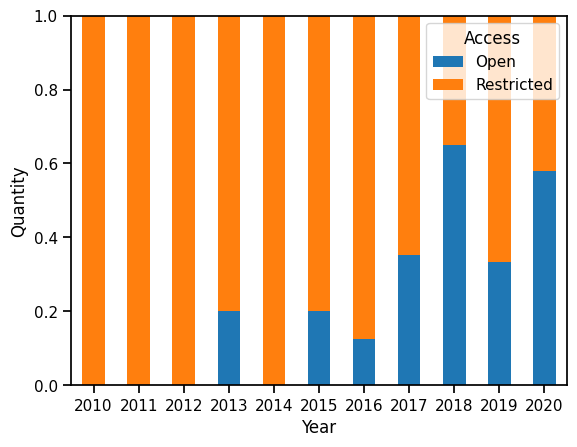

In [28]:
df_access = df_data_type[["paper_id","apa_citation",'Access', "year", "model_id"]]

df_access = df_access.groupby(
        ["paper_id",'Access']
        ).nth(0)
df_access.reset_index(inplace=True)

df_access_crosstab = pd.crosstab(index=df_access['year'], columns=df_access['Access'],normalize='index')

g = df_access_crosstab.plot(kind='bar',
                        stacked=True,
                        rot=0)
g.set_ylim([0, 1])
g.set(xlabel = 'Year', ylabel = 'Quantity')

#### ¿Cual es la frecuencia de uso de cada bse de datos encontrada?

6. Gráfico frencuencia de uso de cada base de datos pública encontrada
- Interpretacion: Un predominio de pocas bases de datos. Estamos todo el tiempo sacando conclusiones sobre los mismos sujetos? Ver predominio de bases de datos publicas por sobre las privadas
- No se ha tenido en cuenta el dato aportado por Lorenzo (mas de una db por paper)

In [29]:
df_data_type_sin_duplicates = df_data_type.drop_duplicates(subset='paper_id')

In [30]:
df_db = df_data_type.groupby(['paper_id',"public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']).nth(0)
df_db.reset_index(inplace=True)

In [31]:
df_db = fn.multi_reversing(df_db, 'model_id', df_db[["public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']])
df_db = df_db.replace('Multimodal Dyadic Behavior (MMDB)', 'MMDB')

In [32]:
df_db["variable"].value_counts()

db_private          61
is_database         34
db_public            4
db_uppon_request     1
Name: variable, dtype: int64

In [33]:
df_db["variable"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

db_private          61.0%
is_database         34.0%
db_public            4.0%
db_uppon_request     1.0%
Name: variable, dtype: object

In [34]:
df_data_type[["Access", "model_id", "public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']]
df_data_type[["public_database",'use_multiple_db', 'db_private', 'db_public','db_private_and_public', 'db_uppon_request', 'is_database']].value_counts()


public_database  use_multiple_db  db_private  db_public  db_private_and_public  db_uppon_request  is_database
-                -                x           -          -                      -                 -              60
                                  -           -          -                      -                 x              34
                                              x          -                      -                 -               4
                                              -          -                      x                 -               1
                                  x           -          -                      -                 .               1
dtype: int64

In [35]:
df_data_type["Access"].value_counts()

Restricted    61
Open          39
Name: Access, dtype: int64

In [36]:
freq_data_base = df_data_type.groupby(['paper_id', 'deap',
       'amigos', 'mahnob', 'case', 'ascertain', 'cog_load',
       'multimodal_dyadic_behavior', 'recola', 'decaf',
       'driving_workload', 'liris', 'sense_emotion', 'pmemo',
       'hazumi1911', 'bio_vid_emo_db', 'dreamer',
       'non_eeg_biosignals_data_set_for_assessment_and_visualization_of_neurological_status',
       'stress_recognition_in_automobile_drivers_data_set', 'pspm_hra1']).nth(0)
freq_data_base.reset_index(inplace=True)

db_freq = fn.multi_reversing(freq_data_base, 'model_id', freq_data_base[['deap',
       'amigos', 'mahnob', 'case', 'ascertain', 'cog_load',
       'multimodal_dyadic_behavior', 'recola', 'decaf',
       'driving_workload', 'liris', 'sense_emotion', 'pmemo',
       'hazumi1911', 'bio_vid_emo_db', 'dreamer',
       'non_eeg_biosignals_data_set_for_assessment_and_visualization_of_neurological_status',
       'stress_recognition_in_automobile_drivers_data_set', 'pspm_hra1']])
db_freq['variable'].value_counts()

deap                          9
amigos                        7
mahnob                        7
pmemo                         3
ascertain                     2
recola                        2
multimodal_dyadic_behavior    1
liris                         1
hazumi1911                    1
bio_vid_emo_db                1
Name: variable, dtype: int64

In [37]:
db_freq['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

deap                          26.5%
amigos                        20.6%
mahnob                        20.6%
pmemo                          8.8%
ascertain                      5.9%
recola                         5.9%
multimodal_dyadic_behavior     2.9%
liris                          2.9%
hazumi1911                     2.9%
bio_vid_emo_db                 2.9%
Name: variable, dtype: object

In [38]:
db_freq['variable'] = db_freq['variable'].replace(
    to_replace=['multimodal_dyadic_behavior'], 
    value='MMDB')

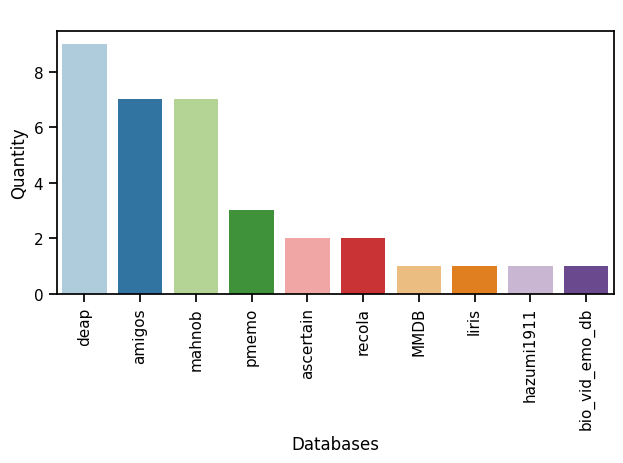

In [39]:
titulos = [' ', 'Databases', 'Quantity']
fn.bar_plot('variable',db_freq,titulos)

In [40]:
df_data_type

,paper_id,Access,model_id,apa_citation,year,public_database,use_multiple_db,db_private,db_public,db_private_and_public,...,driving_workload,liris,sense_emotion,pmemo,hazumi1911,bio_vid_emo_db,dreamer,non_eeg_biosignals_data_set_for_assessment_and_visualization_of_neurological_status,stress_recognition_in_automobile_drivers_data_set,pspm_hra1
0,1,Restricted,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",2017,-,-,x,-,-,...,-,-,-,-,-,-,-,-,-,-
1,2,Restricted,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",2016,-,-,x,-,-,...,-,-,-,-,-,-,-,-,-,-
2,3,Open,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",2018,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,4,Open,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",2018,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,5,Restricted,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",2016,-,-,x,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Open,482,"Yang, H. C., & Lee, C. C. (2019, September). A...",2020,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
96,96,Restricted,492,"Kołodziej, M., Tarnowski, P., Majkowski, A., &...",2020,-,-,x,-,-,...,-,-,-,-,-,-,-,-,-,-
97,97,Open,493,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
98,98,Open,495,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",2018,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [41]:
df_access = df_data_type[["paper_id","apa_citation",'Access', "year", "model_id"]]

df_access = df_access.groupby(
        ["paper_id",'Access']
        ).nth(0)
df_access.reset_index(inplace=True)

df_access_crosstab = pd.crosstab(index=df_access['year'], columns=df_access['Access'],normalize='index')

In [42]:
df_access_crosstab

Access,Open,Restricted
year,,
2010,0.000000,1.000000
2011,0.000000,1.000000
2012,0.000000,1.000000
2013,0.200000,0.800000
2014,0.000000,1.000000
2015,0.200000,0.800000
2016,0.125000,0.875000
2017,0.352941,0.647059
2018,0.650000,0.350000


C:\Users\someo\AppData\Local\Temp\ipykernel_112240\2489159856.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels())
C:\Users\someo\AppData\Local\Temp\ipykernel_112240\2489159856.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels())


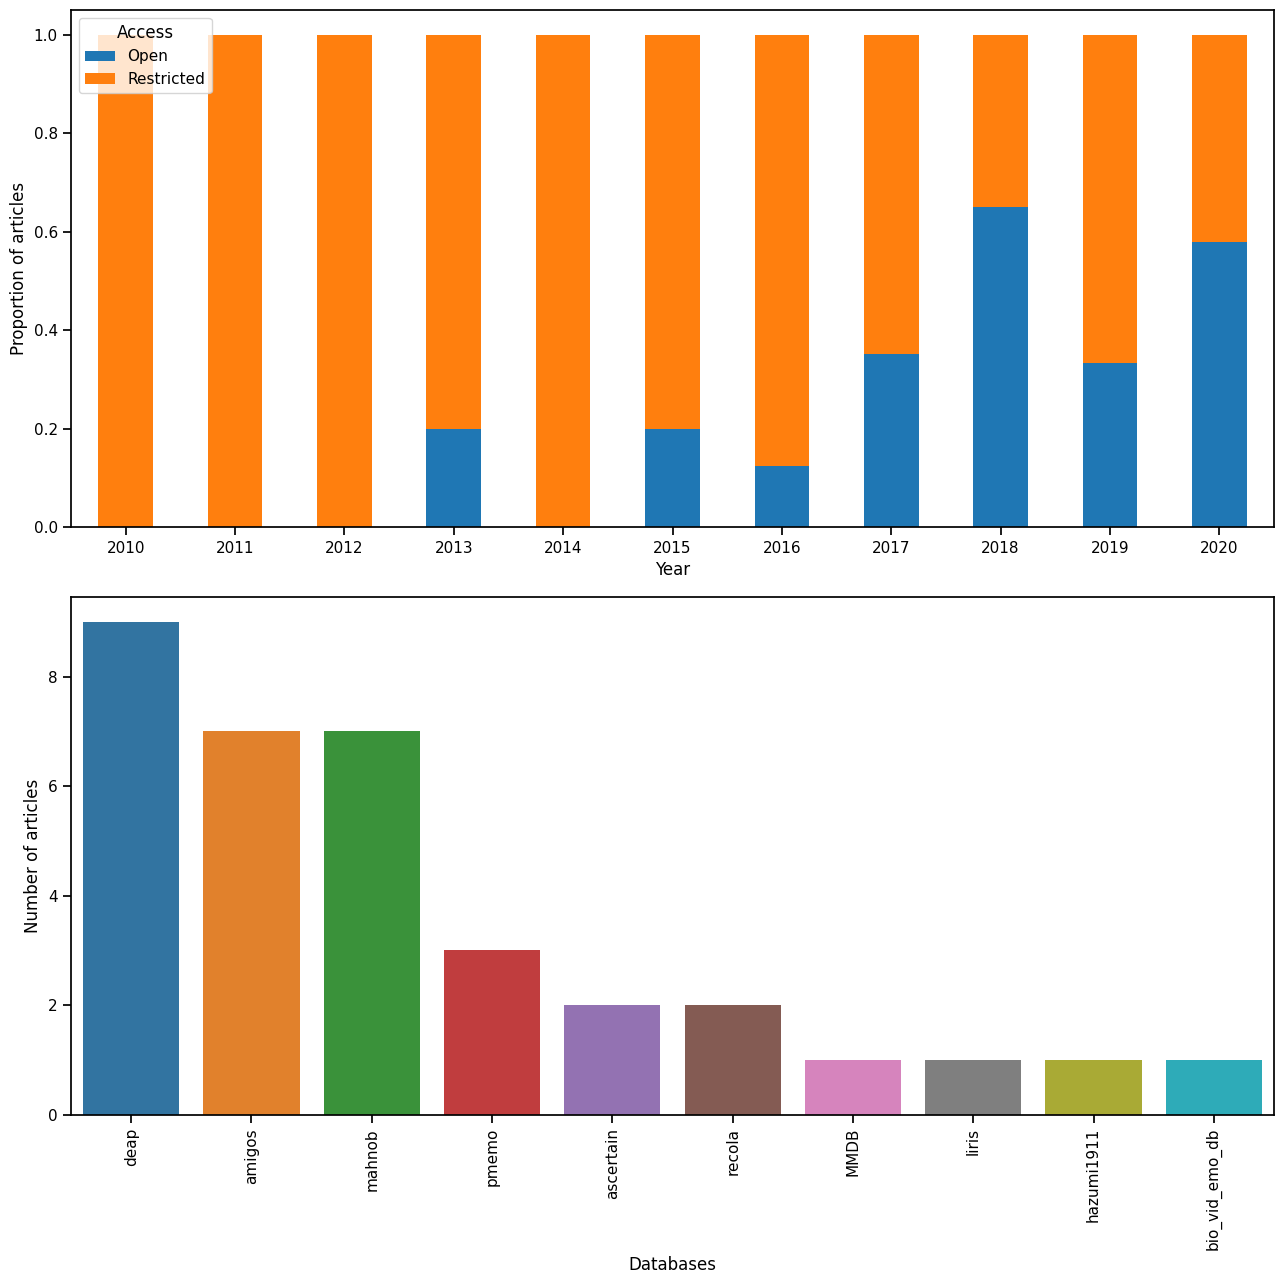

In [43]:
fig, axes = plt.subplots(2, 1)

fig.set_figheight(13)
fig.set_figwidth(13)

ax1 = df_access_crosstab.plot(kind='bar',
                        stacked=True,
                        rot=0,
                        ax=axes[0])


ax2 = sns.countplot(x="variable", 
                    data=db_freq, 
                    order = getattr(db_freq, "variable").value_counts().index,
                    ax=axes[1])

titulos = ['Frequency of use of public databases', 'Databases', 'Quantity']

ax1.set_yticklabels(ax1.get_yticklabels())
ax2.set_yticklabels(ax2.get_yticklabels())
ax1.set_xticklabels(ax1.get_xticklabels())
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

ax1.set_xlabel("Year")
ax1.set_ylabel("Proportion of articles")
ax2.set_xlabel("Databases")
ax2.set_ylabel("Number of articles")

ax1.legend(title='Access', loc='upper left')

fig.tight_layout()

### 3. Participants

In [44]:
df_participants= df_participants.fillna('-')
df_participants.head()

,paper_id,model_id,apa_citation,n,n_female,mean_age,meadian_age,range_age,country
0,1,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",45,20,-,-,-,Spain
1,2,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",-,-,-,-,-,China
2,3,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",32,16,26.9,-,19-37,-
3,3,4,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",32,16,26.9,-,19-37,-
4,4,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",27,16,26.06,-,19-40,-


#### country

In [45]:
df_participants_country = df_participants.groupby(['paper_id', 'country']).nth(0)
df_participants_country.reset_index(inplace =  True)
df_participants_country["country"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-            77.8%
Malasya       5.1%
China         3.0%
Iran          3.0%
Spain         1.0%
USA           1.0%
Germany       1.0%
India         1.0%
Indonesia     1.0%
Canada        1.0%
French        1.0%
Finland       1.0%
Korea         1.0%
Italy         1.0%
Poland        1.0%
Name: country, dtype: object

In [46]:
participants_total = df_participants.groupby(['paper_id', 'n']).nth(0)
participants_total.reset_index(inplace =  True)

In [47]:
participants_total["n"].unique()

array(['45', '-', '32', '27', '121', '15', '6', '30', '19', '20', '39',
       '52', '25', '35', '46', '22', '8', '23', '11', '33', '40', '10',
       '255', '58', '21', '13', '42', '4', '31', '254', '26', '28', '18',
       '100', '162', '9', '55', '457', '24', '860'], dtype=object)

In [48]:
participants_total["n"].value_counts()

-      11
27     11
32     11
40      8
30      4
10      4
4       3
457     3
11      3
20      3
13      3
21      3
25      3
35      3
19      3
26      2
58      2
46      2
22      2
15      2
31      2
100     1
18      1
162     1
28      1
254     1
9       1
55      1
24      1
45      1
42      1
255     1
33      1
23      1
8       1
52      1
39      1
6       1
121     1
860     1
Name: n, dtype: int64

In [49]:
participants_without_n= participants_total[participants_total['n']== '27']
participants_without_n

,paper_id,n,model_id,apa_citation,n_female,mean_age,meadian_age,range_age,country
3,4,27,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",16,26.06,-,19-40,-
4,5,27,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",27,19.44,-,18-22,-
9,10,27,44,"Machot, F. A., Ali, M., Ranasinghe, S., Mosa, ...",16,26.06,-,19-40,-
15,16,27,93,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",16,26.06,-,19-40,-
19,20,27,130,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",16,26.06,-,19-40,-
34,35,27,195,"Ferdinando, H., & Alasaarela, E. (2018). Emoti...",16,26.06,-,19-40,-
38,37,27,228,"Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...",16,26.06,-,19-40,-
64,59,27,304,"Yu, D., & Sun, S. (2020). A systematic explora...",16,26.06,-,19-40,-
65,60,27,315,"Al Machot, F., Elmachot, A., Ali, M., Al Macho...",16,26.06,-,19-40,-
75,69,27,360,"Wei, W., Jia, Q., Feng, Y., & Chen, G. (2018)....",16,26.06,-,19-40,-


In [50]:
participants_n= participants_total[participants_total['n']!= '-']
participants_n

,paper_id,n,model_id,apa_citation,n_female,mean_age,meadian_age,range_age,country
0,1,45,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",20,-,-,-,Spain
2,3,32,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",16,26.9,-,19-37,-
3,4,27,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",16,26.06,-,19-40,-
4,5,27,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",27,19.44,-,18-22,-
5,6,121,12,"Feng, H., Golshan, H. M., & Mahoor, M. H. (201...",-,-,-,1-3,USA
...,...,...,...,...,...,...,...,...,...
102,95,40,482,"Yang, H. C., & Lee, C. C. (2019, September). A...",13,28.3,-,-,-
103,96,22,492,"Kołodziej, M., Tarnowski, P., Majkowski, A., &...",-,20,-,-,Poland
104,97,32,493,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",16,26.9,-,19-37,-
105,98,58,495,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",21,30,-,-,-


57.020833333333336


C:\Users\someo\AppData\Local\Temp\ipykernel_112240\91305593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants_n["n"] = participants_n["n"].astype(int)


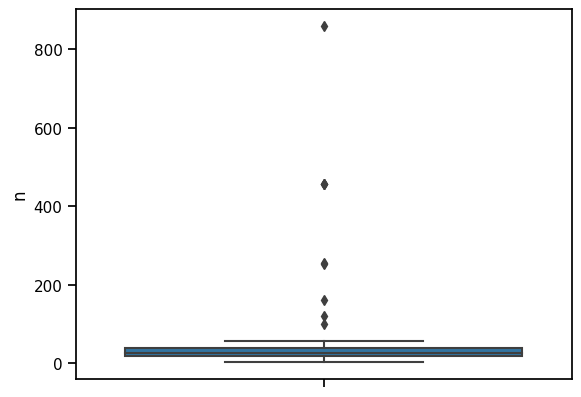

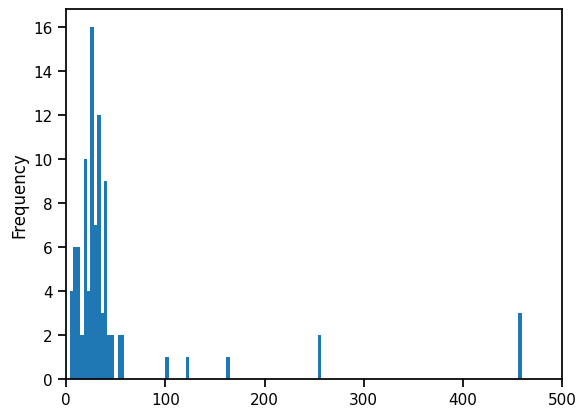

In [51]:
participants_n["n"] = participants_n["n"].astype(int)
print(participants_n['n'].mean())
g = sns.boxplot(y="n", data=participants_n)
plt.show()
g2 = participants_n['n'].plot(bins = 250,kind ='hist', xlim = [0,500])
plt.show()

In [52]:
participants_no_n= participants_total[participants_total['n']== '-']
participants_no_n

,paper_id,n,model_id,apa_citation,n_female,mean_age,meadian_age,range_age,country
1,2,-,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",-,-,-,-,China
27,28,-,158,"Das, P., Khasnobish, A., & Tibarewala, D. N. (...",-,-,-,-,-
36,37,-,221,"Gjoreski, M., Luštrek, M., Gams, M., & Mitrevs...",-,-,-,-,-
44,40,-,251,"Milchevski, A., Rozza, A., & Taskovski, D. (20...",-,-,-,-,-
51,47,-,270,"Bornoiu, I.-V., Strungaru, R., & Grigore, O. (...",-,-,-,25-65,-
53,49,-,276,"Drungilas, D., Bielskis, A. A., & Denisov, V. ...",-,-,-,-,-
58,54,-,285,"Cheng, J., & Liu, G. (2013). Computing nonline...",-,20,-,-,-
74,68,-,359,"García-Faura, Á., Hernández-García, A., Fernán...",-,23.11,-,17-60,-
78,72,-,369,"Golgouneh, A., & Tarvirdizadeh, B. (2020). Fab...",-,-,-,-,-
96,90,-,469,"Katada, S., Okada, S., Hirano, Y., & Komatani,...",-,-,-,-,-


In [53]:
participants_female = df_participants.groupby(['paper_id', 'n_female']).nth(0)
participants_female.reset_index(inplace =  True)

In [54]:
participants_without_female= participants_female[participants_female['n_female'] == '-']
participants_without_female

,paper_id,n_female,model_id,apa_citation,n,mean_age,meadian_age,range_age,country
1,2,-,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",-,-,-,-,China
5,6,-,12,"Feng, H., Golshan, H. M., & Mahoor, M. H. (201...",121,-,-,1-3,USA
7,8,-,40,"Dobbins, C., Fairclough, S., Lisboa, P., & Nav...",6,-,-,-,-
11,12,-,47,"Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...",20,22.83,-,19-30,Malasya
12,13,-,51,"Setyohadi, D. B., Kusrohmaniah, S., Gunawan, S...",39,-,-,-,Indonesia
14,15,-,67,"Md Ali, S. H., Ibne Reaz, M., Ahmad, S. A., Mi...",25,23.92,-,21-39,Malasya
20,21,-,132,"Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...",8,-,-,-,-
21,22,-,144,"Nisa’Minhad, K., Ali, S. H. M., Khai, J. O. S....",19,-,-,23-36,Malasya
23,24,-,149,"Greco, A., Valenza, G., Citi, L., & Scilingo, ...",25,-,-,25-35,-
25,26,-,154,"Zhang, Q., Lai, X., & Liu, G. (2016). Emotion ...",35,-,-,18-22,China


In [55]:
participants_female= participants_female[participants_female['n_female'] != '-']
participants_female

,paper_id,n_female,model_id,apa_citation,n,mean_age,meadian_age,range_age,country
0,1,20,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",45,-,-,-,Spain
2,3,16,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",32,26.9,-,19-37,-
3,4,16,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",27,26.06,-,19-40,-
4,5,27,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",27,19.44,-,18-22,-
6,7,3,20,"Schmidt, P., Reiss, A., Duerichen, R., & Van L...",15,27.5,-,-,Germany
...,...,...,...,...,...,...,...,...,...
98,93,13,478,"Rahim, A., Sagheer, A., Nadeem, K., Dar, M. N....",40,28.3,-,-,-
99,94,236,480,"Yin, G., Sun, S., Zhang, H., Yu, D., Li, C., Z...",457,-,-,-,-
100,95,13,482,"Yang, H. C., & Lee, C. C. (2019, September). A...",40,28.3,-,-,-
102,97,16,493,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",32,26.9,-,19-37,-


In [56]:
participants_female["n_female"].unique()

array(['20', '16', '27', '3', '9', '33', '14', '12', '15', '11', '4',
       '13', '6', '117', '21', '7', '19', '2', '18', '5', '45', '76', '1',
       '37', '10', '236', '8'], dtype=object)

25.589041095890412


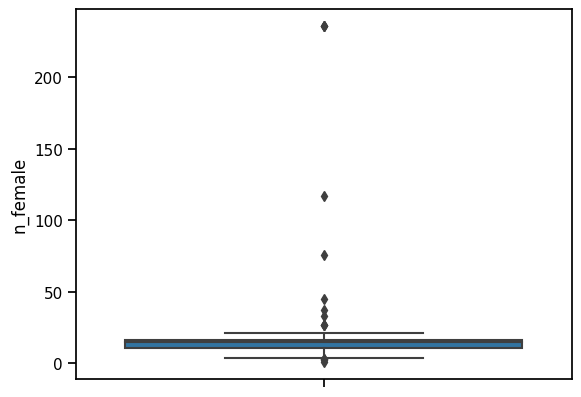

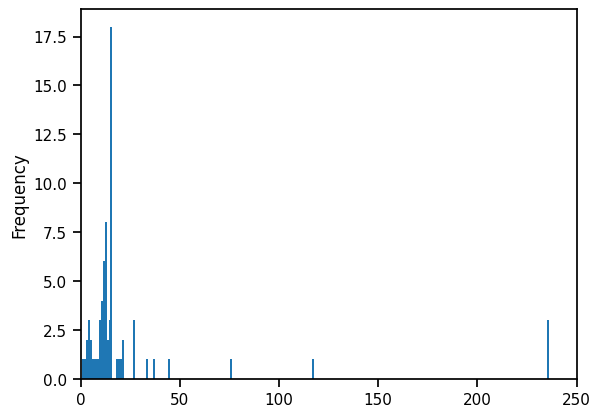

In [57]:
participants_female["n_female"] = participants_female["n_female"].astype(int)
print(participants_female['n_female'].mean())
g = sns.boxplot(y="n_female", data=participants_female)
plt.show()
participants_female['n_female'].plot(bins = 250,kind ='hist', xlim = [0,250])
plt.show()

In [58]:
df_p_range_age = df_participants.groupby(['paper_id', 'range_age']).nth(0)
df_p_range_age.reset_index(inplace =  True)

In [59]:
df_p_range_age['range_age'].unique()

array(['-', '19-37', '19-40', '18-22', '1-3', '21-30', '20-40', '19-30',
       '21-39', '21-25', '21-59', '23-36', '25-35', '19-25', '23-57',
       '22-45', '20-35', '21-24', '20-50', '25-28', '25-65', '21-38',
       '23-44', '20-25', '24-34', '19-24', '20-34', '17-60', '18-29',
       '22-32', '18-28', '20-26', '20-36', '18-45', '21-28', '20-23'],
      dtype=object)

In [60]:
df_p_range_age_no_cero= df_p_range_age[df_p_range_age['range_age'] != '-']

In [61]:
df_p_range_age_no_cero

,paper_id,range_age,model_id,apa_citation,n,n_female,mean_age,meadian_age,country
2,3,19-37,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",32,16,26.9,-,-
3,4,19-40,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",27,16,26.06,-,-
4,5,18-22,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",27,27,19.44,-,-
5,6,1-3,12,"Feng, H., Golshan, H. M., & Mahoor, M. H. (201...",121,-,-,-,USA
8,9,21-30,43,"Amalan, S., Shyam, A., Anusha, A. S., Preejith...",30,9,-,-,India
9,10,19-40,44,"Machot, F. A., Ali, M., Ranasinghe, S., Mosa, ...",27,16,26.06,-,-
10,11,20-40,45,"Girardi, D., Lanubile, F., & Novielli, N. (201...",19,3,-,-,-
11,12,19-30,47,"Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...",20,-,22.83,-,Malasya
14,15,21-39,67,"Md Ali, S. H., Ibne Reaz, M., Ahmad, S. A., Mi...",25,-,23.92,-,Malasya
15,16,19-40,93,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",27,16,26.06,-,-


In [62]:
df_p_range_age_no_cero["range_age"].value_counts()

19-37    10
19-40     9
18-22     2
19-25     2
21-38     2
23-36     2
17-60     1
20-25     1
24-34     1
19-24     1
20-34     1
18-29     1
22-32     1
18-28     1
20-26     1
20-36     1
18-45     1
21-28     1
23-44     1
20-50     1
25-65     1
25-28     1
21-24     1
20-35     1
22-45     1
23-57     1
25-35     1
21-59     1
21-25     1
21-39     1
19-30     1
20-40     1
21-30     1
1-3       1
20-23     1
Name: range_age, dtype: int64

In [63]:
df_p_range_age_cero_na= df_p_range_age[df_p_range_age['range_age'] == '-']
df_p_range_age_cero_na
#48

,paper_id,range_age,model_id,apa_citation,n,n_female,mean_age,meadian_age,country
0,1,-,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",45,20,-,-,Spain
1,2,-,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",-,-,-,-,China
6,7,-,20,"Schmidt, P., Reiss, A., Duerichen, R., & Van L...",15,3,27.5,-,Germany
7,8,-,40,"Dobbins, C., Fairclough, S., Lisboa, P., & Nav...",6,-,-,-,-
12,13,-,51,"Setyohadi, D. B., Kusrohmaniah, S., Gunawan, S...",39,-,-,-,Indonesia
13,14,-,52,"Soleymani, M., & Mortillaro, M. (2018). Behavi...",52,33,25.7,-,-
17,18,-,127,"Keren, G., Kirschstein, T., Marchi, E., Ringev...",46,27,22,-,-
20,21,-,132,"Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...",8,-,-,-,-
26,27,-,155,"Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...",11,11,22.73,-,Iran
27,28,-,158,"Das, P., Khasnobish, A., & Tibarewala, D. N. (...",-,-,-,-,-


In [64]:
df_p_mean_age = df_participants.groupby(['paper_id', 'mean_age']).nth(0)
df_p_mean_age.reset_index(inplace =  True)

In [65]:
df_p_mean_with_age= df_p_mean_age[df_p_mean_age['mean_age'] != '-']
df_p_mean_with_age

,paper_id,mean_age,model_id,apa_citation,n,n_female,meadian_age,range_age,country
2,3,26.9,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",32,16,-,19-37,-
3,4,26.06,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",27,16,-,19-40,-
4,5,19.44,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",27,27,-,18-22,-
6,7,27.5,20,"Schmidt, P., Reiss, A., Duerichen, R., & Van L...",15,3,-,-,Germany
9,10,26.06,44,"Machot, F. A., Ali, M., Ranasinghe, S., Mosa, ...",27,16,-,19-40,-
...,...,...,...,...,...,...,...,...,...
100,93,28.3,478,"Rahim, A., Sagheer, A., Nadeem, K., Dar, M. N....",40,13,-,-,-
102,95,28.3,482,"Yang, H. C., & Lee, C. C. (2019, September). A...",40,13,-,-,-
103,96,20,492,"Kołodziej, M., Tarnowski, P., Majkowski, A., &...",22,-,-,-,Poland
104,97,26.9,493,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",32,16,-,19-37,-


In [66]:
df_p_mean_with_no_age= df_p_mean_age[df_p_mean_age['mean_age'] == '-']
df_p_mean_with_no_age
#44

,paper_id,mean_age,model_id,apa_citation,n,n_female,meadian_age,range_age,country
0,1,-,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",45,20,-,-,Spain
1,2,-,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",-,-,-,-,China
5,6,-,12,"Feng, H., Golshan, H. M., & Mahoor, M. H. (201...",121,-,-,1-3,USA
7,8,-,40,"Dobbins, C., Fairclough, S., Lisboa, P., & Nav...",6,-,-,-,-
8,9,-,43,"Amalan, S., Shyam, A., Anusha, A. S., Preejith...",30,9,-,21-30,India
10,11,-,45,"Girardi, D., Lanubile, F., & Novielli, N. (201...",19,3,-,20-40,-
12,13,-,51,"Setyohadi, D. B., Kusrohmaniah, S., Gunawan, S...",39,-,-,-,Indonesia
16,17,-,95,"Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...",35,14,-,21-25,Iran
18,19,-,129,"Hernández-García, A., Fernández-Martínez, F., ...",22,12,-,21-59,-
20,21,-,132,"Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...",8,-,-,-,-


25.812857142857144
19.44
36.1


C:\Users\someo\AppData\Local\Temp\ipykernel_112240\2064706475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p_mean_with_age["mean_age"] = df_p_mean_with_age["mean_age"].astype(float)


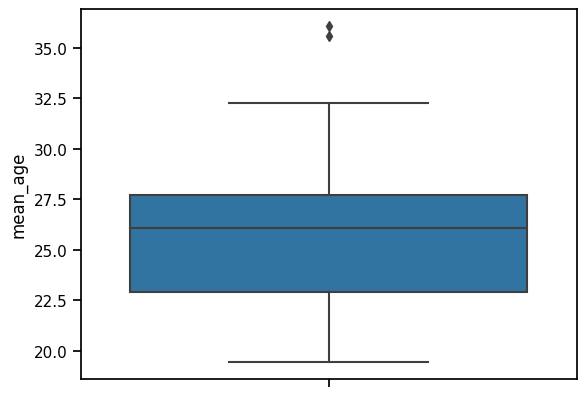

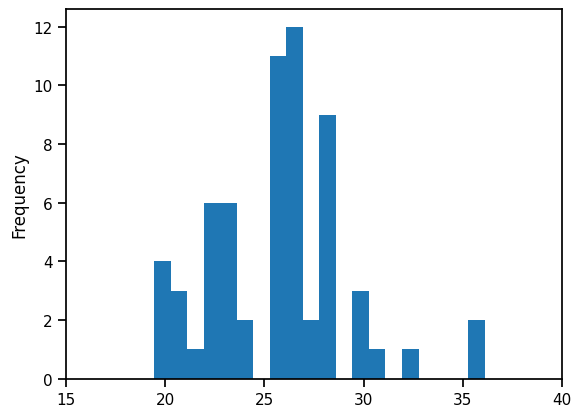

In [67]:
df_p_mean_with_age["mean_age"] = df_p_mean_with_age["mean_age"].astype(float)
print(df_p_mean_with_age['mean_age'].mean())
print(df_p_mean_with_age['mean_age'].min())
print(df_p_mean_with_age['mean_age'].max())
g = sns.boxplot(y="mean_age", data=df_p_mean_with_age)
plt.show()
df_p_mean_with_age['mean_age'].plot(bins = 20,kind ='hist', xlim = [15,40])
plt.show()

In [68]:
df_participants.loc[df_participants['range_age'] == "-", 'range_age'] = "0"

In [69]:
range_age = df_p_range_age[df_p_range_age['range_age'] != '-']
range_age

,paper_id,range_age,model_id,apa_citation,n,n_female,mean_age,meadian_age,country
2,3,19-37,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",32,16,26.9,-,-
3,4,19-40,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",27,16,26.06,-,-
4,5,18-22,10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",27,27,19.44,-,-
5,6,1-3,12,"Feng, H., Golshan, H. M., & Mahoor, M. H. (201...",121,-,-,-,USA
8,9,21-30,43,"Amalan, S., Shyam, A., Anusha, A. S., Preejith...",30,9,-,-,India
9,10,19-40,44,"Machot, F. A., Ali, M., Ranasinghe, S., Mosa, ...",27,16,26.06,-,-
10,11,20-40,45,"Girardi, D., Lanubile, F., & Novielli, N. (201...",19,3,-,-,-
11,12,19-30,47,"Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...",20,-,22.83,-,Malasya
14,15,21-39,67,"Md Ali, S. H., Ibne Reaz, M., Ahmad, S. A., Mi...",25,-,23.92,-,Malasya
15,16,19-40,93,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",27,16,26.06,-,-


In [70]:
range_age['range_age'] = range_age['range_age'].str.replace('-',' ')
range_age['range_age'].str.split()
df_ranges = range_age['range_age'].str.split(pat = ' ', expand = True)
df_ranges = df_ranges.dropna()
df_ranges

C:\Users\someo\AppData\Local\Temp\ipykernel_112240\176192115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range_age['range_age'] = range_age['range_age'].str.replace('-',' ')


,0,1
2,19,37
3,19,40
4,18,22
5,1,3
8,21,30
9,19,40
10,20,40
11,19,30
14,21,39
15,19,40


In [71]:
df_ranges[0] = df_ranges[0].astype(int)
df_ranges[1] = df_ranges[1].astype(int)

In [72]:
df_ranges[0].min()

1

In [73]:
df_ranges[1].max()

65

In [74]:
first = df_ranges[0].to_list()
second = df_ranges[1].to_list()
final_list = first + second
df_range_merged = pd.DataFrame(final_list, columns = ['ages'])
df_range_merged

,ages
0,19
1,19
2,18
3,1
4,21
...,...
107,37
108,28
109,38
110,23


In [75]:
print(df_range_merged['ages'].mean())

27.794642857142858


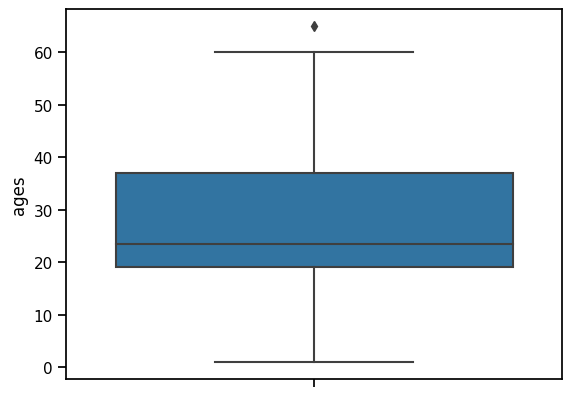

In [76]:
g = sns.boxplot(y="ages", data=df_range_merged)
plt.show()

### 4. Self-report

In [77]:
df_self_report = df_self_report.fillna('-')

#### ¿Cuantas veces fueron testeadas juntas las distintas dimensiones y categorias emocionales?

##### Primero obtenemos las categorias emocionales usadas y su frecuencia

* Hubo 55 modelos que usaron categorias emocionales, siendo disgust, fear, y sadness las mas repetidas.
* Tener en cuenta que un modelo puede usar mas de una categoria, por lo que la funcion get_values no funciona en este caso, y un paper puede concentrar la mayoria de los usos de un conjunto de categorias

In [78]:
emotional_categories_grouped = df_self_report.groupby(['paper_id','stress', 'disgust', 'fear', 'sadness', 'surprise' ,'happiness', 'pleasant',
                            'anxiety', 'neutral', 'funny', 'boredom', 'relaxation', 'amusement', 'joy']).nth(0)
emotional_categories_grouped.reset_index(inplace=True)

In [79]:
emotional_categories_grouped = fn.multi_reversing(
    emotional_categories_grouped, 'paper_id', 
    emotional_categories_grouped
    [[
    'stress', 'disgust', 'fear', 'sadness', 'surprise' ,'happiness', 'pleasant',
    'anxiety', 'neutral', 'funny', 'boredom', 'relaxation', 'amusement', 'joy'
    ]])

In [80]:
emotional_categories_grouped

,paper_id,variable,value
74,72,stress,x
106,4,disgust,x
112,10,disgust,x
118,16,disgust,x
122,20,disgust,x
...,...,...,...
1376,37,joy,x
1399,59,joy,x
1401,60,joy,x
1410,69,joy,x


In [81]:
print(emotional_categories_grouped['variable'].value_counts())
print(emotional_categories_grouped['variable'].unique())

disgust       19
fear          19
sadness       19
neutral       19
surprise      17
anxiety       11
amusement     10
joy           10
happiness      8
boredom        2
stress         1
pleasant       1
funny          1
relaxation     1
Name: variable, dtype: int64
['stress' 'disgust' 'fear' 'sadness' 'surprise' 'happiness' 'pleasant'
 'anxiety' 'neutral' 'funny' 'boredom' 'relaxation' 'amusement' 'joy']


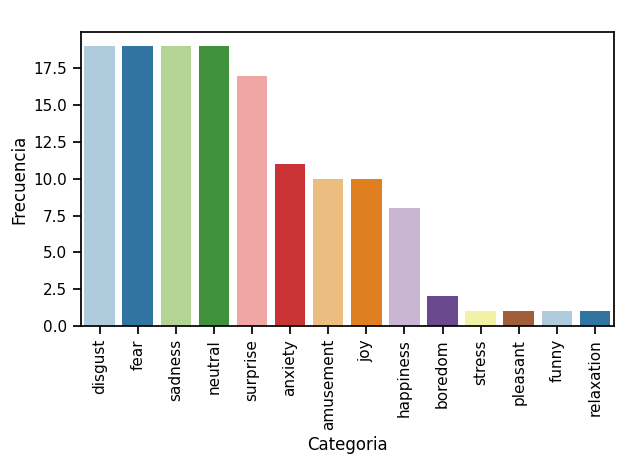

In [82]:
titulos = [' ', 'Categoria', 'Frecuencia']
fn.bar_plot('variable',emotional_categories_grouped,titulos)

In [83]:
emotional_dimensions_grouped = df_self_report.groupby([
    'paper_id','valence',
    'arousal', 'dominance', 'like_dislike', 'familiarity', 'engagement',
    'predictability']).nth(0)
emotional_dimensions_grouped.reset_index(inplace=True)

In [84]:
emotional_dimensions_grouped = fn.multi_reversing(
    emotional_dimensions_grouped, 'paper_id', 
    emotional_dimensions_grouped
    [[
    'valence',
    'arousal', 'dominance', 'like_dislike', 'familiarity', 'engagement',
    'predictability'
    ]])

In [85]:
emotional_dimensions_grouped

,paper_id,variable,value
2,3,valence,x
3,4,valence,x
4,5,valence,x
9,10,valence,x
10,11,valence,x
...,...,...,...
658,35,predictability,x
662,37,predictability,x
685,59,predictability,x
686,60,predictability,x


In [86]:
print(emotional_dimensions_grouped['variable'].value_counts())
print(emotional_dimensions_grouped['variable'].unique())

valence           49
arousal           49
dominance         29
like_dislike      20
familiarity       19
predictability     9
engagement         2
Name: variable, dtype: int64
['valence' 'arousal' 'dominance' 'like_dislike' 'familiarity' 'engagement'
 'predictability']


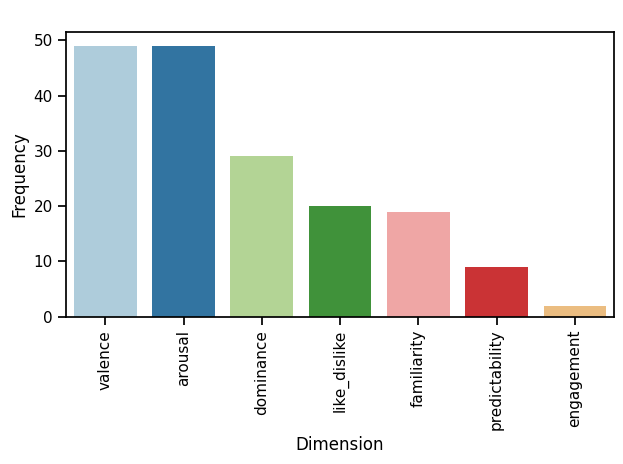

In [87]:
titulos = [' ', 'Dimension', 'Frequency']
fn.bar_plot('variable',emotional_dimensions_grouped,titulos)

In [88]:
def label_model (row):
   if row['is_classifier'] == "x" :
      return 'classifier'
   if row['is_regressor'] == "x" :
      return 'regressor'
   return 'Other'

In [89]:
df_alg_perf['model']  = df_alg_perf.apply(lambda row: label_model(row), axis=1)

In [90]:
df_alg_perf['model'].value_counts()

classifier    448
regressor      51
Name: model, dtype: int64

In [91]:
df_models = df_alg_perf[["apa_citation",'model', "year", "model_id"]]

[Text(0.5, 0, 'Año'), Text(0, 0.5, 'Cantidad de modelos')]

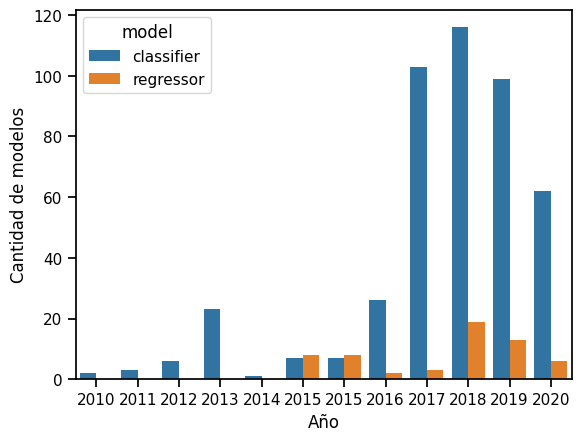

In [92]:
g= sns.countplot(x='year', 
    data= df_models, 
    hue='model', 
    order=category_order)
g.set(xlabel = 'Año', ylabel = 'Cantidad de modelos')

In [93]:
df_models["model"].value_counts()

classifier    448
regressor      51
Name: model, dtype: int64

In [94]:
df_models["model"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

classifier    89.8%
regressor     10.2%
Name: model, dtype: object

#### Grafo

In [95]:
#creacion matrix de adyacencia
df_self_report.fillna('-', inplace= True)
self_0 = df_self_report[df_self_report['is_categorial']!= '-']

df_matrix_con_paperid_0 = self_0.groupby(
        ["paper_id",'stress', 'disgust', 'fear', 'sadness', 'surprise' ,'happiness', 'pleasant','anxiety', 'neutral', 'funny', 'boredom', 'relaxation', 'amusement', 'joy']
        ).nth(0)
df_matrix_con_paperid_0.reset_index(inplace=True)

print(df_matrix_con_paperid_0)

df_matrix = df_matrix_con_paperid_0[['stress', 'disgust', 'fear', 'sadness', 'surprise' ,'happiness', 'pleasant','anxiety', 'neutral', 'funny', 'boredom', 'relaxation', 'amusement', 'joy']]

df_matrix = df_matrix.replace('-', 0)
df_matrix = df_matrix.replace('x', 1)
adj_matrix = df_matrix.T.dot(df_matrix)
np.fill_diagonal(adj_matrix.values, 0)

    paper_id stress disgust fear sadness surprise happiness pleasant anxiety  \
0          4      -       x    x       x        x         -        -       x   
1         10      -       x    x       x        x         -        -       x   
2         16      -       x    x       x        x         -        -       x   
3         20      -       x    x       x        x         -        -       x   
4         32      -       x    x       x        x         x        -       -   
5         35      -       x    x       x        x         -        -       x   
6         37      -       x    x       x        x         -        -       x   
7         37      -       x    x       x        x         x        -       -   
8         43      -       -    -       -        -         -        -       -   
9         59      -       x    x       x        x         -        -       x   
10        60      -       x    x       x        x         -        -       x   
11        64      -       x    x       x

In [96]:
adj_matrix

,stress,disgust,fear,sadness,surprise,happiness,pleasant,anxiety,neutral,funny,boredom,relaxation,amusement,joy
stress,0,0,0,0,0,0,0,0,0,0,0,0,0,0
disgust,0,0,19,19,17,8,1,10,17,0,0,0,10,9
fear,0,19,0,19,17,8,1,10,17,0,0,0,10,9
sadness,0,19,19,0,17,8,1,10,17,0,0,0,10,9
surprise,0,17,17,17,0,8,0,9,17,0,0,0,9,9
happiness,0,8,8,8,8,0,0,0,8,0,0,0,0,0
pleasant,0,1,1,1,0,0,0,1,0,0,0,0,0,0
anxiety,0,10,10,10,9,0,1,0,9,0,0,0,9,9
neutral,0,17,17,17,17,8,0,9,0,1,0,0,9,9
funny,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [97]:
G = nx.DiGraph(adj_matrix)

In [98]:
weights = nx.get_edge_attributes(G,'weight').values()


"""labels=nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G,pos,
        edge_labels=labels,
        font_size=20,
        font_color="black",
        font_weight="bold")"""

'labels=nx.get_edge_attributes(G, "weight")\nnx.draw_networkx_edge_labels(G,pos,\n        edge_labels=labels,\n        font_size=20,\n        font_color="black",\n        font_weight="bold")'

In [99]:
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

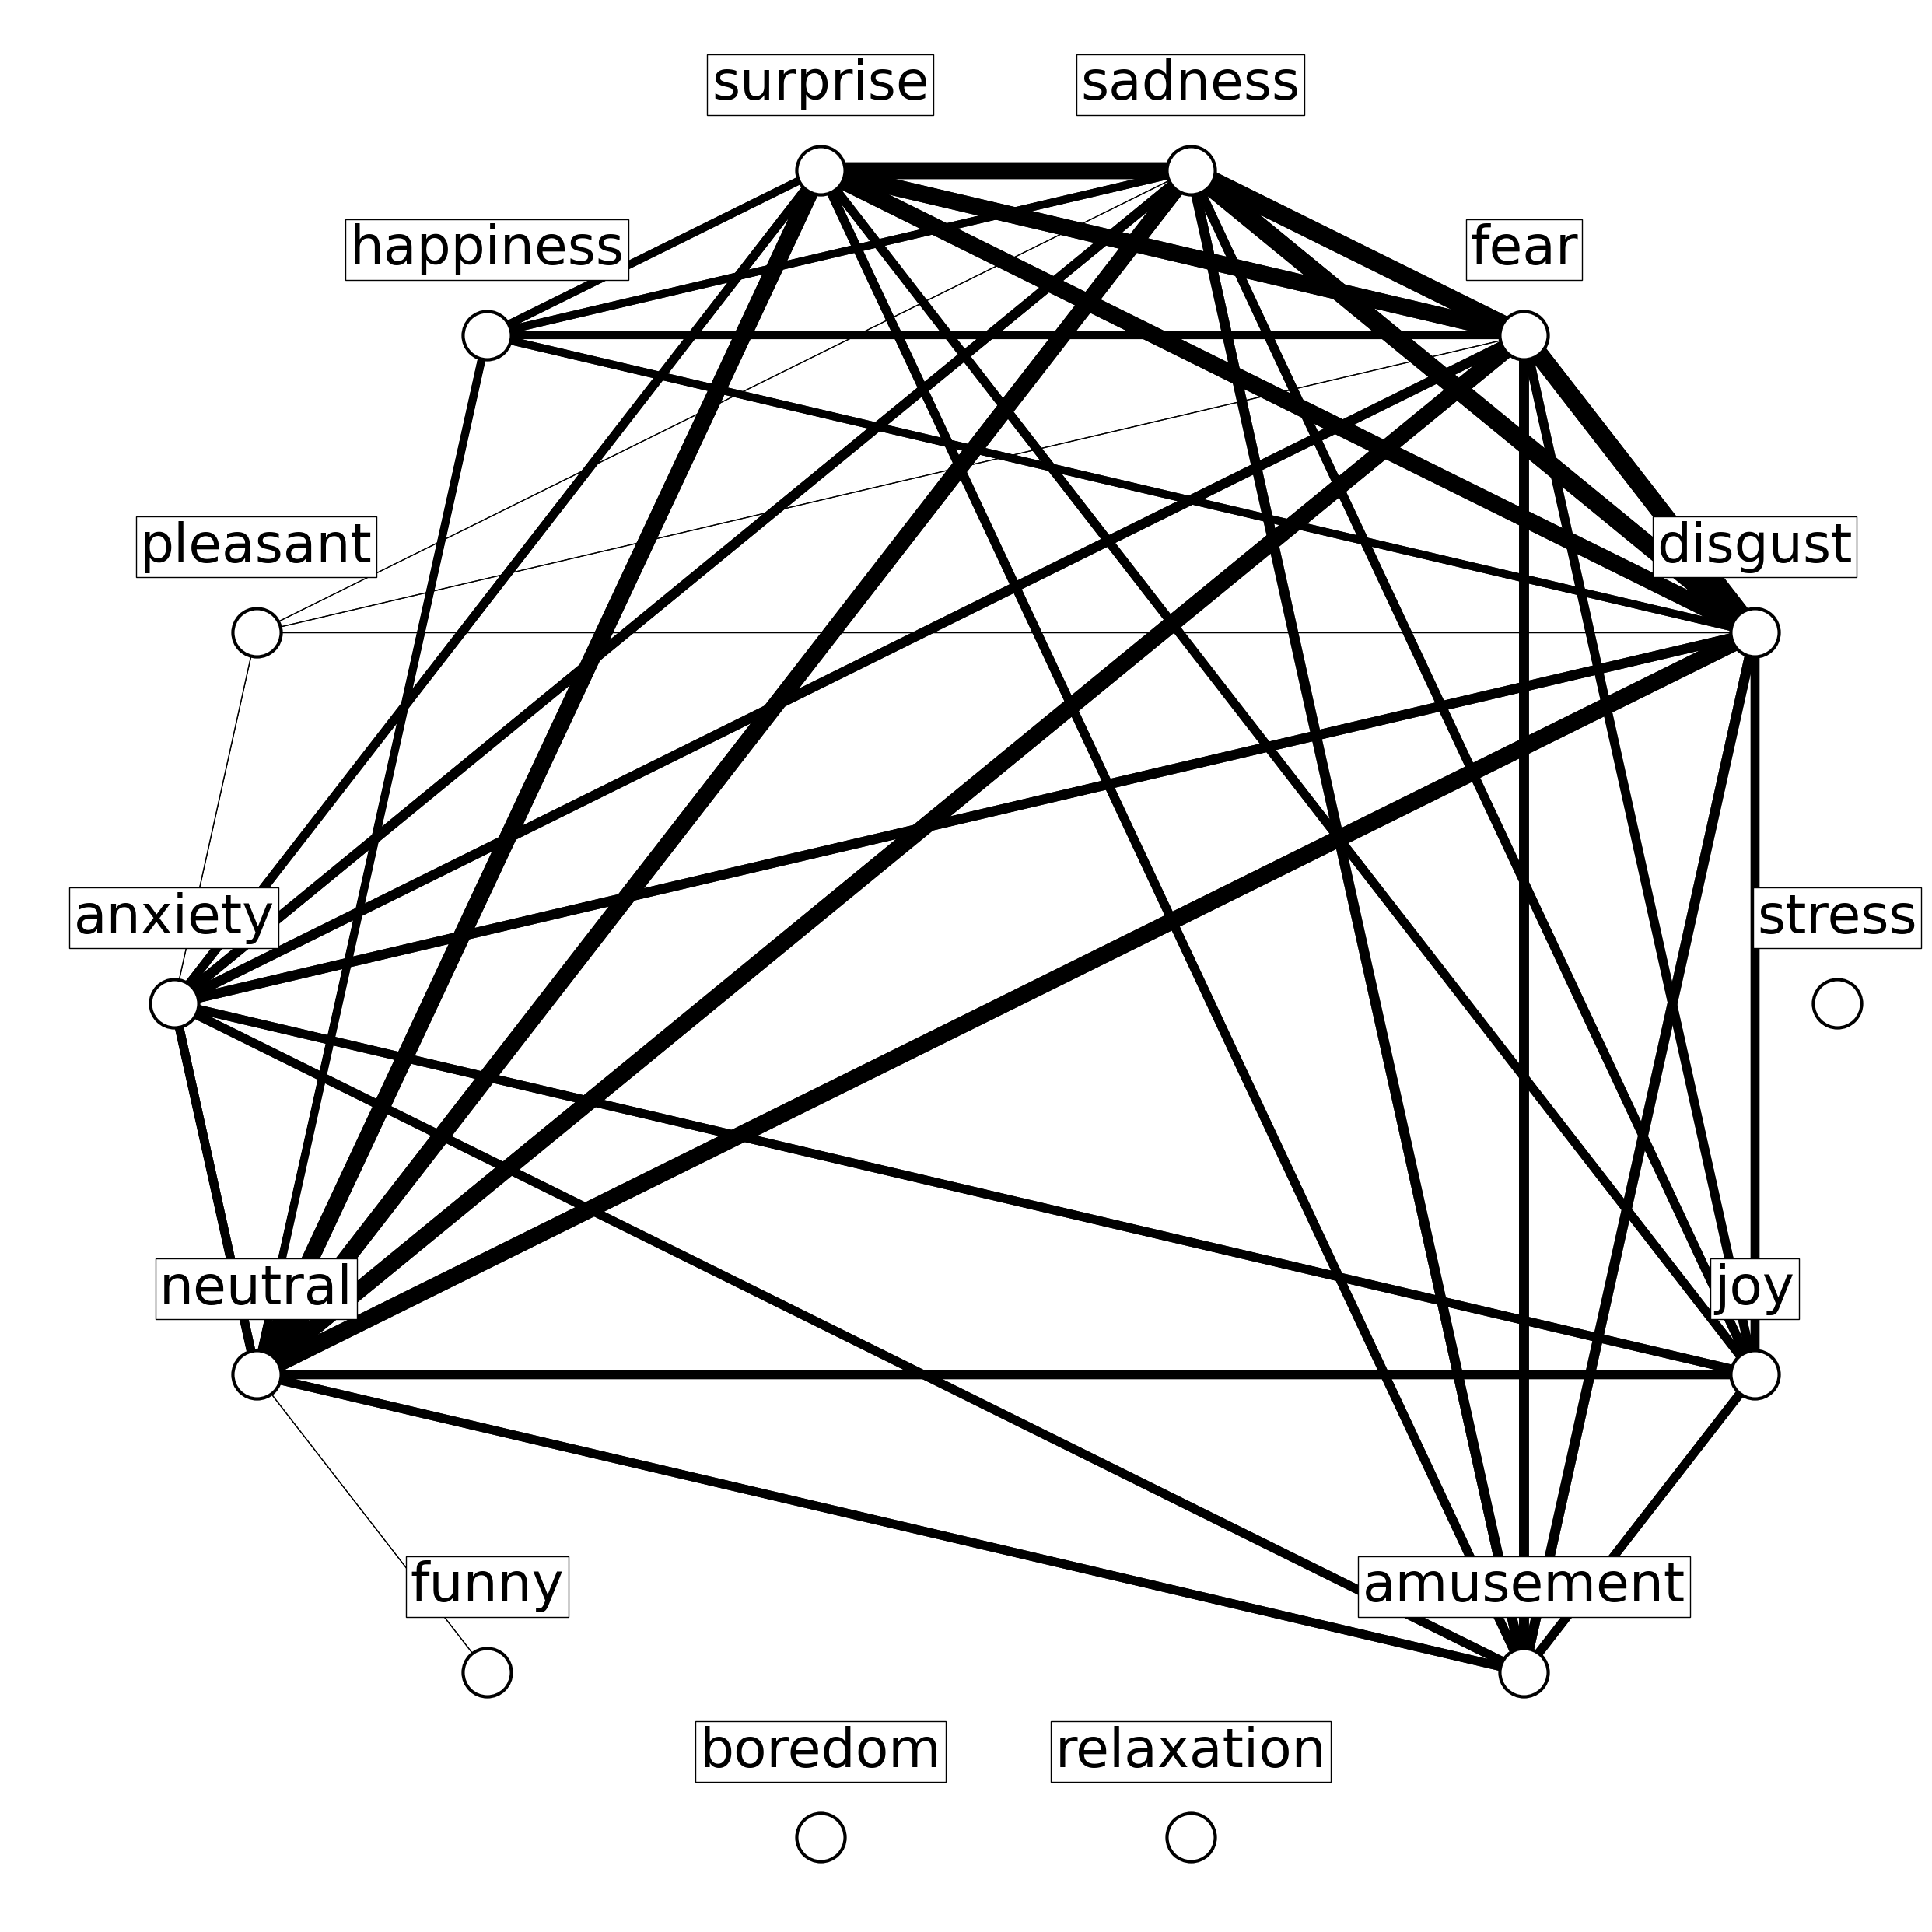

In [100]:
fig, ax = plt.subplots(figsize=(25, 25))

pos = nx.circular_layout(G)

nx.draw(G, pos, 
        edgecolors="black", 
        node_color='white',
        width=[i/1.1 for i in weights],
        node_size=2000,
        linewidths=3,
        alpha=1,
        font_size=25,
        font_weight="bold",
        arrows=False,
        edge_cmap=plt.colormaps['copper'])

boxes = dict(facecolor='white', alpha=1)

pos_nodes = nudge(pos, 0, 0.1)    
nx.draw_networkx_labels(G, pos=pos_nodes, labels=None, font_size=50, font_color='k',
                        font_family='sans serif', font_weight='normal', alpha=None, bbox=boxes, horizontalalignment='center', 
                        verticalalignment='center', ax=None, clip_on=True)

plt.tight_layout()

In [101]:
fn.relaciones(weights)

Interacciones con 9 conexiones se observaron 12.0 veces.
Interacciones con 17 conexiones se observaron 7.0 veces.
Interacciones con 10 conexiones se observaron 6.0 veces.
Interacciones con 1 conexiones se observaron 5.0 veces.
Interacciones con 8 conexiones se observaron 5.0 veces.
Interacciones con 19 conexiones se observaron 3.0 veces.


Grafo para dimensiones emocionales (no categorias emocionales)

In [102]:
#creacion matrix de adyacencia
df_self_report.fillna('-', inplace= True)
self_dim = df_self_report[df_self_report['is_dimensional']!= '-']

df_matrix_con_paperid_dim = self_dim.groupby(
        ['paper_id', 'valence','arousal', 'dominance', 'like_dislike', 'familiarity', 'engagement','predictability', "stress", "boredom", "relaxation"]
        ).nth(0)
df_matrix_con_paperid_dim.reset_index(inplace=True)

df_matrix_dim = df_matrix_con_paperid_dim[
        ['valence','arousal', 'dominance', 'like_dislike', 'familiarity', 'engagement','predictability', "stress", "boredom", "relaxation"]
        ]

df_matrix_dim = df_matrix_dim.replace('-', 0)
df_matrix_dim = df_matrix_dim.replace('x', 1)
adj_matrix_dim = df_matrix_dim.T.dot(df_matrix_dim)
np.fill_diagonal(adj_matrix_dim.values, 0)

In [103]:
adj_matrix_dim

,valence,arousal,dominance,like_dislike,familiarity,engagement,predictability,stress,boredom,relaxation
valence,0,49,29,20,19,2,9,0,0,0
arousal,49,0,29,20,19,2,9,0,0,0
dominance,29,29,0,17,17,0,9,0,0,0
like_dislike,20,20,17,0,19,2,0,0,0,0
familiarity,19,19,17,19,0,2,0,0,0,0
engagement,2,2,0,2,2,0,0,0,0,0
predictability,9,9,9,0,0,0,0,0,0,0
stress,0,0,0,0,0,0,0,0,0,0
boredom,0,0,0,0,0,0,0,0,0,0
relaxation,0,0,0,0,0,0,0,0,0,0


In [104]:
Gd = nx.DiGraph(adj_matrix_dim)

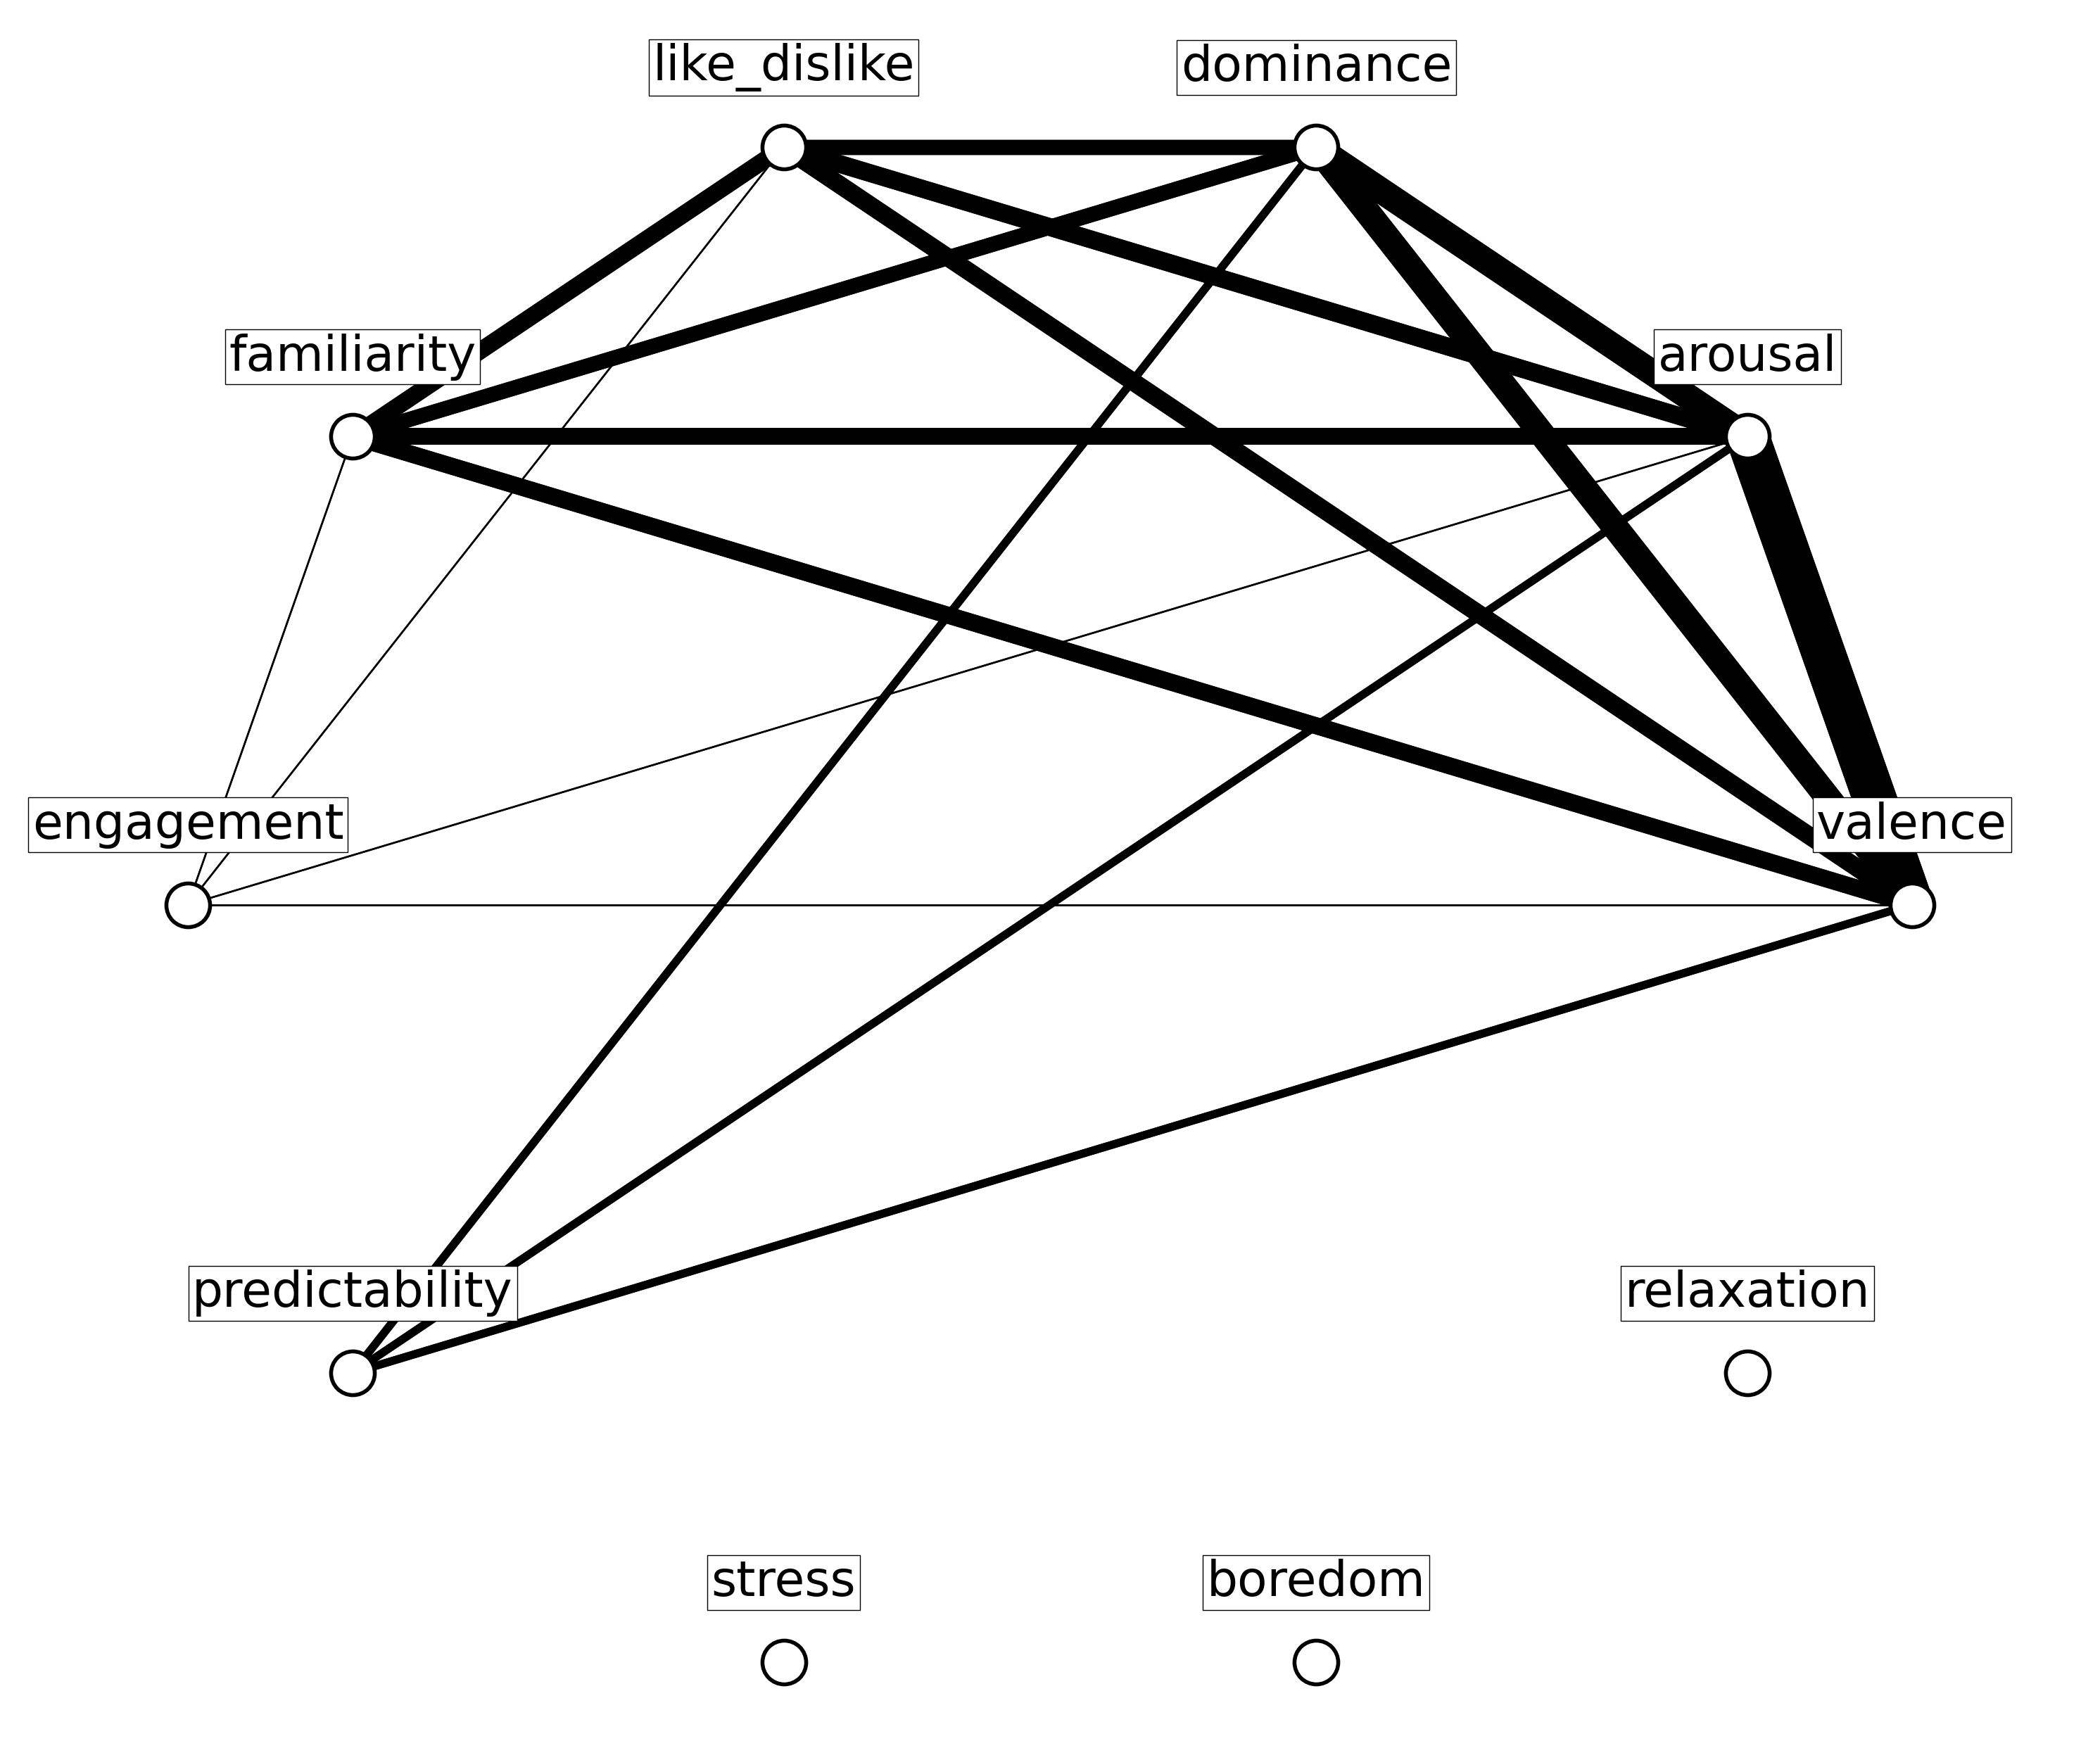

In [105]:
weights = nx.get_edge_attributes(Gd,'weight').values()

fig, ax = plt.subplots(figsize=(30, 25))

pos = nx.circular_layout(Gd)

nx.draw(Gd, pos, 
        edgecolors="black", 
        node_color='white',
        width=[i/1.1 for i in weights],
        node_size=2000,
        linewidths=4,
        alpha=1,
        font_size=25,
        font_weight="bold",
        arrows=False,
        edge_cmap=plt.colormaps['copper'])

boxes = dict(facecolor='white', alpha=1)

pos_nodes = nudge(pos, 0, 0.1)    
nx.draw_networkx_labels(Gd, pos=pos_nodes, labels=None, font_size=50, font_color='k',
                        font_family='sans serif', font_weight='normal', alpha=None, bbox=boxes, horizontalalignment='center', 
                        verticalalignment='center', ax=None, clip_on=True)

plt.tight_layout()

In [106]:
fn.relaciones(weights)

Interacciones con 2 conexiones se observaron 4.0 veces.
Interacciones con 9 conexiones se observaron 3.0 veces.
Interacciones con 19 conexiones se observaron 3.0 veces.
Interacciones con 17 conexiones se observaron 2.0 veces.
Interacciones con 20 conexiones se observaron 2.0 veces.
Interacciones con 29 conexiones se observaron 2.0 veces.
Interacciones con 49 conexiones se observaron 1.0 veces.


In [107]:
df_self_report

,paper_id,model_id,apa_citation,use_questionnaire,affective_questionnaire_SAM,affective_questionnaire_PSS,affective_questionnaire_PANAS,affective_questionnaire_DES,affective_questionnaire_affective_grid,is_dimensional,...,fear,sadness,surprise,happiness,pleasant,anxiety,neutral,funny,amusement,joy
0,1,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",Relies on other's questionnaire,x,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,2,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",No,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,3,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",Yes,x,-,-,-,-,x,...,-,-,-,-,-,-,-,-,-,-
3,3,4,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",Yes,x,-,-,-,-,x,...,-,-,-,-,-,-,-,-,-,-
4,4,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",Yes,x,-,-,-,-,x,...,x,x,x,-,-,x,x,-,x,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,98,496,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",Yes,-,-,-,-,-,x,...,-,-,-,-,-,-,-,-,-,-
495,98,497,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",Yes,-,-,-,-,-,x,...,-,-,-,-,-,-,-,-,-,-
496,98,498,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",Yes,-,-,-,-,-,x,...,-,-,-,-,-,-,-,-,-,-
497,99,499,"Yun, H., Fortenbacher, A., Helbig, R., & Pinkw...",Yes,x,-,-,-,-,x,...,-,-,-,-,-,-,-,-,-,-


In [108]:
df_self_report['use_questionnaire'] = df_self_report['use_questionnaire'].str.replace('x',"Yes")
df_self_report['use_questionnaire'] = df_self_report['use_questionnaire'].str.replace('-',"No")
df_self_report['use_questionnaire'] = df_self_report['use_questionnaire'].str.replace("Relies on  other's questionnaire","Relies on other's questionnaire")
df_self_report['use_questionnaire'] = df_self_report['use_questionnaire'].str.replace("Relies on other´s questionaire","Relies on other's questionnaire")

In [109]:
df_self_report.iloc[:,0:9]
used_questionnaries = df_self_report.groupby(['paper_id', "use_questionnaire"]).nth(0)
used_questionnaries.reset_index(inplace= True)
used_questionnaries["use_questionnaire"].value_counts()

No                                 48
Yes                                48
Relies on other's questionnaire     6
No                                  1
Name: use_questionnaire, dtype: int64

In [110]:
used_questionnaries["use_questionnaire"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

No                                 46.6%
Yes                                46.6%
Relies on other's questionnaire     5.8%
No                                  1.0%
Name: use_questionnaire, dtype: object

In [111]:
questionnaries = df_self_report.groupby(['paper_id', 'affective_questionnaire_SAM','affective_questionnaire_PSS', 
                                         "affective_questionnaire_PANAS", "affective_questionnaire_DES", "affective_questionnaire_affective_grid"]).nth(0)
questionnaries.reset_index(inplace= True)
questionnaries = fn.multi_reversing(questionnaries, 'paper_id', questionnaries[['affective_questionnaire_SAM','affective_questionnaire_PSS', "affective_questionnaire_PANAS", "affective_questionnaire_DES", "affective_questionnaire_affective_grid"]])
questionnaries['variable'].value_counts()

affective_questionnaire_SAM               37
affective_questionnaire_PANAS             12
affective_questionnaire_affective_grid     2
affective_questionnaire_PSS                1
affective_questionnaire_DES                1
Name: variable, dtype: int64

In [112]:
questionnaries['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

affective_questionnaire_SAM               69.8%
affective_questionnaire_PANAS             22.6%
affective_questionnaire_affective_grid     3.8%
affective_questionnaire_PSS                1.9%
affective_questionnaire_DES                1.9%
Name: variable, dtype: object

#### relax_bore_stress

In [113]:
df_self_report_compressed = df_self_report[["apa_citation", "boredom", "relaxation", "stress"]]
relax_bore_stress = df_self_report_compressed[df_self_report_compressed['boredom'].isin(['x', 'X']) | df_self_report_compressed['relaxation'].isin(['x', 'X']) | df_self_report_compressed['stress'].isin(['x', 'X'])]

In [114]:
relax_bore_stress

,apa_citation,boredom,relaxation,stress
276,"Giakoumis, D., Tzovaras, D., Moustakas, K., & ...",x,-,-
328,"Seo, J., Laine, T. H., & Sohn, K. A. (2019). A...",x,-,-
329,"Seo, J., Laine, T. H., & Sohn, K. A. (2019). A...",x,-,-
330,"Seo, J., Laine, T. H., & Sohn, K. A. (2019). A...",x,-,-
331,"Martinez, R., Salazar-Ramirez, A., Arruti, A.,...",-,x,-
332,"Martinez, R., Salazar-Ramirez, A., Arruti, A.,...",-,x,-
333,"Martinez, R., Salazar-Ramirez, A., Arruti, A.,...",-,x,-
334,"Martinez, R., Salazar-Ramirez, A., Arruti, A.,...",-,x,-
335,"Martinez, R., Salazar-Ramirez, A., Arruti, A.,...",-,x,-
336,"Martinez, R., Salazar-Ramirez, A., Arruti, A.,...",-,x,-


### 5. Emotion elicitation techniques

In [115]:
df_eet.fillna('-', inplace= True)

In [116]:
df_technniques_no_dup = df_eet.drop_duplicates(subset="paper_id")

In [117]:
df_technniques_no_dup = df_technniques_no_dup.groupby(['paper_id',"technique_name"]).nth(0)
df_technniques_no_dup.reset_index(inplace=True)

In [118]:
df_technniques_no_dup["technique_name"].value_counts()

-                                               75
IAPS                                            10
survival task                                    2
Rapid-ABC play protocol                          1
TSST                                             1
Trier Social Stress Test (TSST)                  1
Flickr                                           1
IADS                                             1
Robin                                            1
-G25\r\nLogitech steering wheel kit              1
Stroop color-word interference test’’ (SCWT)     1
Trier social stress test                         1
Visit website with interruptions                 1
Stroop                                           1
Stoop color word interfence test (SCWT)          1
Name: technique_name, dtype: int64

In [119]:
df_technniques_no_dup["technique_name"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-                                               75.8%
IAPS                                            10.1%
survival task                                    2.0%
Rapid-ABC play protocol                          1.0%
TSST                                             1.0%
Trier Social Stress Test (TSST)                  1.0%
Flickr                                           1.0%
IADS                                             1.0%
Robin                                            1.0%
-G25\r\nLogitech steering wheel kit              1.0%
Stroop color-word interference test’’ (SCWT)     1.0%
Trier social stress test                         1.0%
Visit website with interruptions                 1.0%
Stroop                                           1.0%
Stoop color word interfence test (SCWT)          1.0%
Name: technique_name, dtype: object

In [120]:
df_eet.columns

Index(['paper_id', 'model_id', 'apa_citation', 'is_multimodal',
       'modality_visual', 'modality_auditory', 'modality_somatosensory',
       'task_type_active', 'task_type_pasive', 'technique_name',
       'visual_pictures', 'visual_videos', 'visual_words', 'visual_other',
       'auditory_music', 'auditory_other',
       'technique_clasif_multiple_techniques', 'technique_clasif_driving',
       'technique_clasif_imagination_techniques_or_memory_recall',
       'technique_clasif_social_interactions',
       'technique_clasif_virtual_reality', 'technique_clasif_meditation',
       'technique_clasif_reading', 'technique_clasif_ux',
       'technique_clasif_tactile_enhanced_multimedia_clips',
       'technique_clasif_videogame', 'technique_clasif_puzzle',
       'technique_description', 'elicitation_duration',
       'elicitation_duration_range', 'elicitation_duration_mean',
       'elicitation_duration_median'],
      dtype='object')

In [121]:
df_eet["technique_name"].value_counts()

-                                               388
IAPS                                             29
TSST                                             20
Flickr                                           15
Rapid-ABC play protocol                           8
survival task                                     6
Robin                                             6
Stroop color-word interference test’’ (SCWT)      5
Visit website with interruptions                  5
Stroop                                            5
Stoop color word interfence test (SCWT)           5
-G25\r\nLogitech steering wheel kit               3
IADS                                              2
Trier Social Stress Test (TSST)                   1
Trier social stress test                          1
Name: technique_name, dtype: int64

In [122]:
df_eet["technique_name"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-                                               77.8%
IAPS                                             5.8%
TSST                                             4.0%
Flickr                                           3.0%
Rapid-ABC play protocol                          1.6%
survival task                                    1.2%
Robin                                            1.2%
Stroop color-word interference test’’ (SCWT)     1.0%
Visit website with interruptions                 1.0%
Stroop                                           1.0%
Stoop color word interfence test (SCWT)          1.0%
-G25\r\nLogitech steering wheel kit              0.6%
IADS                                             0.4%
Trier Social Stress Test (TSST)                  0.2%
Trier social stress test                         0.2%
Name: technique_name, dtype: object

In [123]:
techniques_defined = df_eet[df_eet["technique_name"] != "-"]
techniques_defined["technique_name"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

IAPS                                            26.1%
TSST                                            18.0%
Flickr                                          13.5%
Rapid-ABC play protocol                          7.2%
survival task                                    5.4%
Robin                                            5.4%
Stroop color-word interference test’’ (SCWT)     4.5%
Visit website with interruptions                 4.5%
Stroop                                           4.5%
Stoop color word interfence test (SCWT)          4.5%
-G25\r\nLogitech steering wheel kit              2.7%
IADS                                             1.8%
Trier Social Stress Test (TSST)                  0.9%
Trier social stress test                         0.9%
Name: technique_name, dtype: object

In [124]:
df_eet["is_multimodal"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

x    65.9%
-    34.1%
Name: is_multimodal, dtype: object

In [125]:
type_task = df_eet.groupby(['paper_id', 'task_type_active','task_type_pasive']).nth(0)
type_task.reset_index(inplace= True)

In [126]:
len(type_task[(type_task['task_type_active'] == '-') &
            (type_task['task_type_pasive'] == '-')])

21

In [127]:
task_type = fn.multi_reversing(type_task, 'model_id', type_task[['task_type_active','task_type_pasive']])
task_type['variable'].value_counts()

task_type_pasive    66
task_type_active    20
Name: variable, dtype: int64

In [128]:
task_type['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

task_type_pasive    76.7%
task_type_active    23.3%
Name: variable, dtype: object

In [129]:
freq_modality = df_eet.groupby(['paper_id','is_multimodal','modality_visual','modality_auditory', 'modality_somatosensory']).nth(0)
freq_modality.reset_index(inplace=True)

In [130]:
df_modality = fn.multi_reversing(freq_modality, 'model_id', freq_modality[['is_multimodal','modality_visual','modality_auditory', 'modality_somatosensory']])
df_modality['variable'].value_counts()

modality_visual           82
modality_auditory         73
is_multimodal             58
modality_somatosensory     1
Name: variable, dtype: int64

In [131]:
df_modality['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

modality_visual           38.3%
modality_auditory         34.1%
is_multimodal             27.1%
modality_somatosensory     0.5%
Name: variable, dtype: object

In [132]:
number_modality = sum(df_modality['variable'].value_counts())
print (f'Se hallaron {number_modality} instancias en total entre multimodal, visual, auditory y somatosensory.')

Se hallaron 214 instancias en total entre multimodal, visual, auditory y somatosensory.


In [133]:
visual_modality = df_eet.groupby(['paper_id','visual_pictures', 'visual_videos', 'visual_words', 'visual_other']).nth(0)
visual_modality.reset_index(inplace=True)

df_visual_modality = fn.multi_reversing(visual_modality, 'model_id', visual_modality[['visual_pictures', 'visual_videos', 'visual_words', 'visual_other']])
df_visual_modality['variable'].value_counts()

visual_videos      56
visual_pictures    16
visual_words        2
Name: variable, dtype: int64

In [134]:
df_visual_modality['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

visual_videos      75.7%
visual_pictures    21.6%
visual_words        2.7%
Name: variable, dtype: object

In [135]:
other_techniques = df_eet.groupby(['paper_id','visual_pictures', 'visual_videos', 'visual_words', 'visual_other',
'auditory_music', 'auditory_other', 'technique_clasif_driving',
'technique_clasif_imagination_techniques_or_memory_recall',
'technique_clasif_social_interactions',
'technique_clasif_virtual_reality', 'technique_clasif_meditation',
'technique_clasif_reading', 'technique_clasif_ux',
'technique_clasif_tactile_enhanced_multimedia_clips',
'technique_clasif_videogame', 'technique_clasif_puzzle']).nth(0)
other_techniques.reset_index(inplace=True)

df_other_techniques = fn.multi_reversing(other_techniques, 'model_id', other_techniques[['visual_pictures', 'visual_videos', 'visual_words', 'visual_other',
'auditory_music', 'auditory_other', 'technique_clasif_driving',
'technique_clasif_imagination_techniques_or_memory_recall',
'technique_clasif_social_interactions',
'technique_clasif_virtual_reality', 'technique_clasif_meditation',
'technique_clasif_reading', 'technique_clasif_ux',
'technique_clasif_tactile_enhanced_multimedia_clips',
'technique_clasif_videogame', 'technique_clasif_puzzle']])
df_other_techniques['variable'].value_counts()

visual_videos                                         59
auditory_music                                        22
visual_pictures                                       16
auditory_other                                        11
technique_clasif_driving                               4
technique_clasif_social_interactions                   4
visual_words                                           2
technique_clasif_meditation                            2
technique_clasif_virtual_reality                       1
technique_clasif_reading                               1
technique_clasif_ux                                    1
technique_clasif_tactile_enhanced_multimedia_clips     1
technique_clasif_videogame                             1
Name: variable, dtype: int64

In [136]:
all_techniques = df_eet.groupby(['paper_id','visual_pictures', 'visual_videos', 'visual_words', 'visual_other',
                                                            'auditory_music', 'auditory_other', 'technique_clasif_driving',
                                                            'technique_clasif_imagination_techniques_or_memory_recall',
                                                            'technique_clasif_social_interactions',
                                                            'technique_clasif_virtual_reality', 'technique_clasif_meditation',
                                                            'technique_clasif_reading', 'technique_clasif_ux',
                                                            'technique_clasif_tactile_enhanced_multimedia_clips',
                                                            'technique_clasif_videogame', 'technique_clasif_puzzle']).nth(0)
all_techniques.reset_index(inplace=True)

df_all_techniques = fn.multi_reversing(all_techniques, 'model_id', all_techniques[['visual_pictures', 'visual_videos', 'visual_words', 'visual_other',
                                                            'auditory_music', 'auditory_other',
                                                            'technique_clasif_driving',
                                                            'technique_clasif_imagination_techniques_or_memory_recall',
                                                            'technique_clasif_social_interactions',
                                                            'technique_clasif_virtual_reality', 'technique_clasif_meditation',
                                                            'technique_clasif_reading', 'technique_clasif_ux',
                                                            'technique_clasif_tactile_enhanced_multimedia_clips',
                                                            'technique_clasif_videogame', 'technique_clasif_puzzle']])
df_all_techniques['variable'].value_counts()

visual_videos                                         59
auditory_music                                        22
visual_pictures                                       16
auditory_other                                        11
technique_clasif_driving                               4
technique_clasif_social_interactions                   4
visual_words                                           2
technique_clasif_meditation                            2
technique_clasif_virtual_reality                       1
technique_clasif_reading                               1
technique_clasif_ux                                    1
technique_clasif_tactile_enhanced_multimedia_clips     1
technique_clasif_videogame                             1
Name: variable, dtype: int64

In [137]:
len(df_all_techniques['variable'])

125

### 6.EDA

In [138]:
df_eda = df_eda.fillna('-')
eda_devices = df_eda[df_eda['eda_device_specification']!= '-']  #me quedo solo con las rows que usaron dispositivos

#### ¿En cuantas ocasiones no aclara el dispositivo de EDA utilizado?

In [139]:
aver = df_eda.groupby(['paper_id', 'eda_device_specification']).nth(0)
aver.reset_index(inplace= True)
len(aver[aver['eda_device_specification'] == '-'])

13

In [140]:
len(aver["eda_device_specification"])

111

In [141]:
aver["eda_device_specification"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-                                           11.7%
Biosemi ActiveTwo                            9.0%
Biosemi activeTwo                            8.1%
Shimmer 2R                                   7.2%
MP150 BIOPAC                                 2.7%
                                            ...  
Nexus 4 Biofeedback system3                  0.9%
Bodymedia                                    0.9%
ProComp Infinity                             0.9%
MP35 Biopac                                  0.9%
(BITalino (r)evolution Plugged\r\nKit BT     0.9%
Name: eda_device_specification, Length: 62, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 [Text(0, 0, '-'),
  Text(1, 0, 'Biosemi ActiveTwo '),
  Text(2, 0, 'Biosemi activeTwo'),
  Text(3, 0, 'Shimmer 2R'),
  Text(4, 0, 'MP150 BIOPAC'),
  Text(5, 0, 'Empatica E4'),
  Text(6, 0, 'Shimmer'),
  Text(7, 0, 'PowerLab'),
  Text(8, 0, 'BIOPAC'),
  Text(9, 0, 'GSR-2'),
  Text(10, 0, 'BioRadio 150'),
  Text(11, 0, 'Biopac\r\nMP36'),
  Text(12, 0, 'Commercial bluetooth sensor'),
  Text(13, 0, 'Gen II integrated wearable device from Analog Devices, Inc'),
  Text(14, 0, 'Varioport'),
  Text(15, 0, 'MP150 Biopac'),
  Text(16, 0, 'Procomp5 Infiniti'),
  Text(17, 0, 'Varioport-B'),
  Text(18, 0, 'Four Affectiva Q-sensors'),
  Text(19, 0, 'BIOPAC-MP150'),
  Text(20, 0, 'Affectiva-QSensors5'),
  Text(21, 0, 'Grov

) missing from current font.ng\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.ng\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


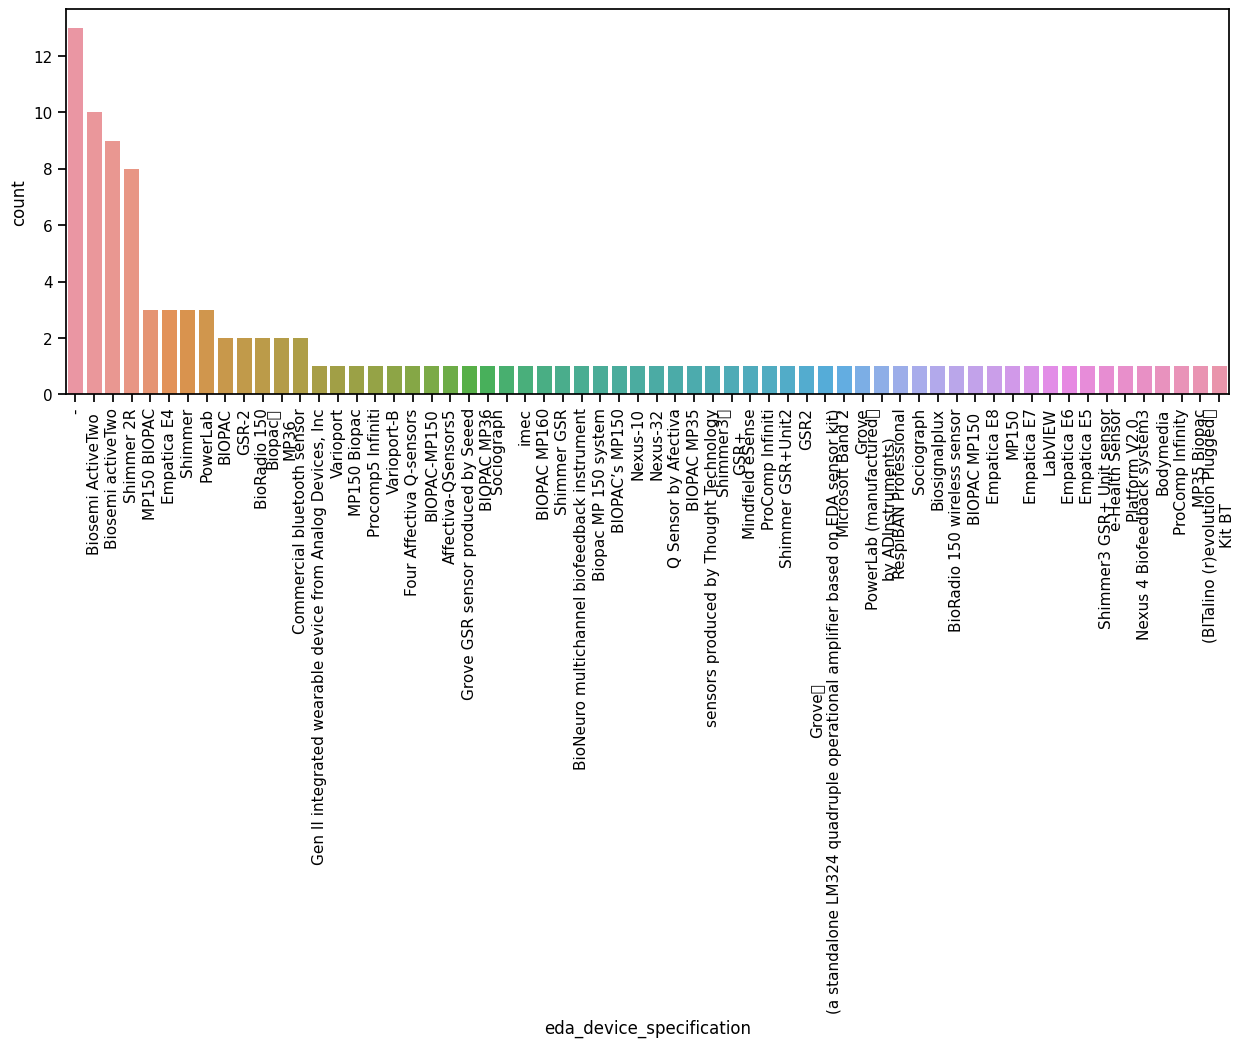

In [142]:
aver["eda_device_specification"].value_counts()
plt.figure(figsize = (15,5))
g = sns.countplot(x="eda_device_specification", data=aver, order = getattr(aver, "eda_device_specification").value_counts().index)
plt.xticks(rotation=90)

#### ¿Cuantos eda devices HOMEMADE hay?

In [143]:
df_eda['eda_device_is_homemade'].value_counts()

-           467
No           20
x             5
homemade      5
Yes           2
Name: eda_device_is_homemade, dtype: int64

In [144]:
df_eda['eda_device_is_homemade'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-           93.6%
No           4.0%
x            1.0%
homemade     1.0%
Yes          0.4%
Name: eda_device_is_homemade, dtype: object

In [145]:
eda_devices = eda_devices.groupby(['paper_id', 'eda_device_specification']).nth(0)
eda_devices.reset_index(inplace=True)

In [146]:
eda_devices['eda_device_specification'].value_counts()

Biosemi ActiveTwo                           10
Biosemi activeTwo                            9
Shimmer 2R                                   8
Shimmer                                      3
MP150 BIOPAC                                 3
                                            ..
LabVIEW                                      1
Shimmer3 GSR+ Unit sensor                    1
Nexus 4 Biofeedback system3                  1
Bodymedia                                    1
(BITalino (r)evolution Plugged\r\nKit BT     1
Name: eda_device_specification, Length: 61, dtype: int64

In [147]:
# REDUCIMOS LAS CATEGORÍAS AGRUPANDOLAS
main_categories = ['BIOPAC', 'Empatica','GSR2','Sociograph', 'Variport', 'Shimmer', 'BioRadio 150', 'Affectiva-QSensors5','ProComp Infinity','PowerLab', 'Grove']

def reduce_categories(list_categories):
    '''
    esta función toma una lista de categorias y reemplaza por ellas a las rows con categorías similares
    
    ej: reemplaza por BIOPAC a 'BIOPAC 150'

    '''
    for category in list_categories:
        for i in eda_devices.loc[:,'eda_device_specification']:
            if fuzz.ratio(category, i) > 45:
                eda_devices.loc[:,'eda_device_specification'] = eda_devices.loc[:,'eda_device_specification'].replace({i:category})

# Reducimos algunas categorías a partir de la funcion reduce_categories
reduce_categories(main_categories)

# Aún quedan algunas categorias sin unificar asi que unifico las restantes y resuelvo las inconsistencias por diferencias de tipeo o abreviaciones
mapping_eda = {
    'MP150 Biopac': 'BIOPAC', 'MP35 Biopac' : 'BIOPAC','MP150':'BIOPAC','Biopac\r\nMP36' : 'BIOPAC',
    'Biosemi activeTwo' : 'Biosemi ActiveTwo', 'Biosemi ActiveTwo ':'Biosemi ActiveTwo',
    'PowerLab (manufactured\r\nby ADInstruments)': 'PowerLab',
    'Affectiva-QSensors5': 'Q Sensor by Afectiva',
    'Shimmer3 GSR+ Unit sensor':'Shimmer',
    'sensors produced by Thought Technology' : 'Thought Technology',
    'Grove\r\n(a standalone LM324 quadruple operational amplifier based on EDA sensor kit)':'Grove',
    'Grove GSR sensor produced by Seeed':'Grove',
    'Gen II integrated wearable device from Analog Devices, Inc': 'Gen II Analog Devices',
    'e-Health Sensor\nPlatform V2.0' : 'e-Health Sensor Platform V2.0',
    '(BITalino (r)evolution Plugged\r\nKit BT':'(BITalino (r)evolution Plugged Kit BT ',
    'Nexus-10' : 'NEXUS', 'Nexus 4 Biofeedback system3':'NEXUS', #NO ESTOY SEGURO SI ESTO REALMENTE SON LO MISMO, O SIQUIERA SI NEXUS ES LA MARCA
    'Nexus-32' : 'NEXUS'         }


eda_devices.loc[:,'eda_device_specification'] = eda_devices.loc[:,'eda_device_specification'].replace(mapping_eda)

In [148]:
eda_devices['eda_device_specification'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Biosemi ActiveTwo                               19.4%
Shimmer                                         16.3%
BIOPAC                                          16.3%
Empatica                                         7.1%
BioRadio 150                                     4.1%
PowerLab                                         4.1%
Grove                                            3.1%
GSR2                                             3.1%
NEXUS                                            3.1%
ProComp Infinity                                 3.1%
Q Sensor by Afectiva                             3.1%
Variport                                         2.0%
Commercial bluetooth sensor                      2.0%
Sociograph                                       2.0%
Mindfield eSense                                 1.0%
BioNeuro multichannel biofeedback instrument     1.0%
Thought Technology                               1.0%
e-Health Sensor Platform V2.0                    1.0%
Bodymedia                   

In [149]:
#In percentage
#Plot
eda_devices['eda_device_specification'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Biosemi ActiveTwo                               19.4%
Shimmer                                         16.3%
BIOPAC                                          16.3%
Empatica                                         7.1%
BioRadio 150                                     4.1%
PowerLab                                         4.1%
Grove                                            3.1%
GSR2                                             3.1%
NEXUS                                            3.1%
ProComp Infinity                                 3.1%
Q Sensor by Afectiva                             3.1%
Variport                                         2.0%
Commercial bluetooth sensor                      2.0%
Sociograph                                       2.0%
Mindfield eSense                                 1.0%
BioNeuro multichannel biofeedback instrument     1.0%
Thought Technology                               1.0%
e-Health Sensor Platform V2.0                    1.0%
Bodymedia                   

¿Cuantos dipositivos de eda diferentes se utilizaron?

In [150]:
n_dispositivos_eda = eda_devices['eda_device_specification'].nunique()
print (f'Se utilizaron {n_dispositivos_eda} dispositivos de EDA diferentes')

Se utilizaron 25 dispositivos de EDA diferentes


¿En cuántas instancias de nuestro interés se especificó el dispositivo de EDA utilizado?

In [151]:
number_eda = sum(eda_devices['eda_device_specification'].value_counts())
print (f' Tenemos {number_eda} de instancias donde se aclaró el dispositivo de EDA utilizado.')

 Tenemos 98 de instancias donde se aclaró el dispositivo de EDA utilizado.


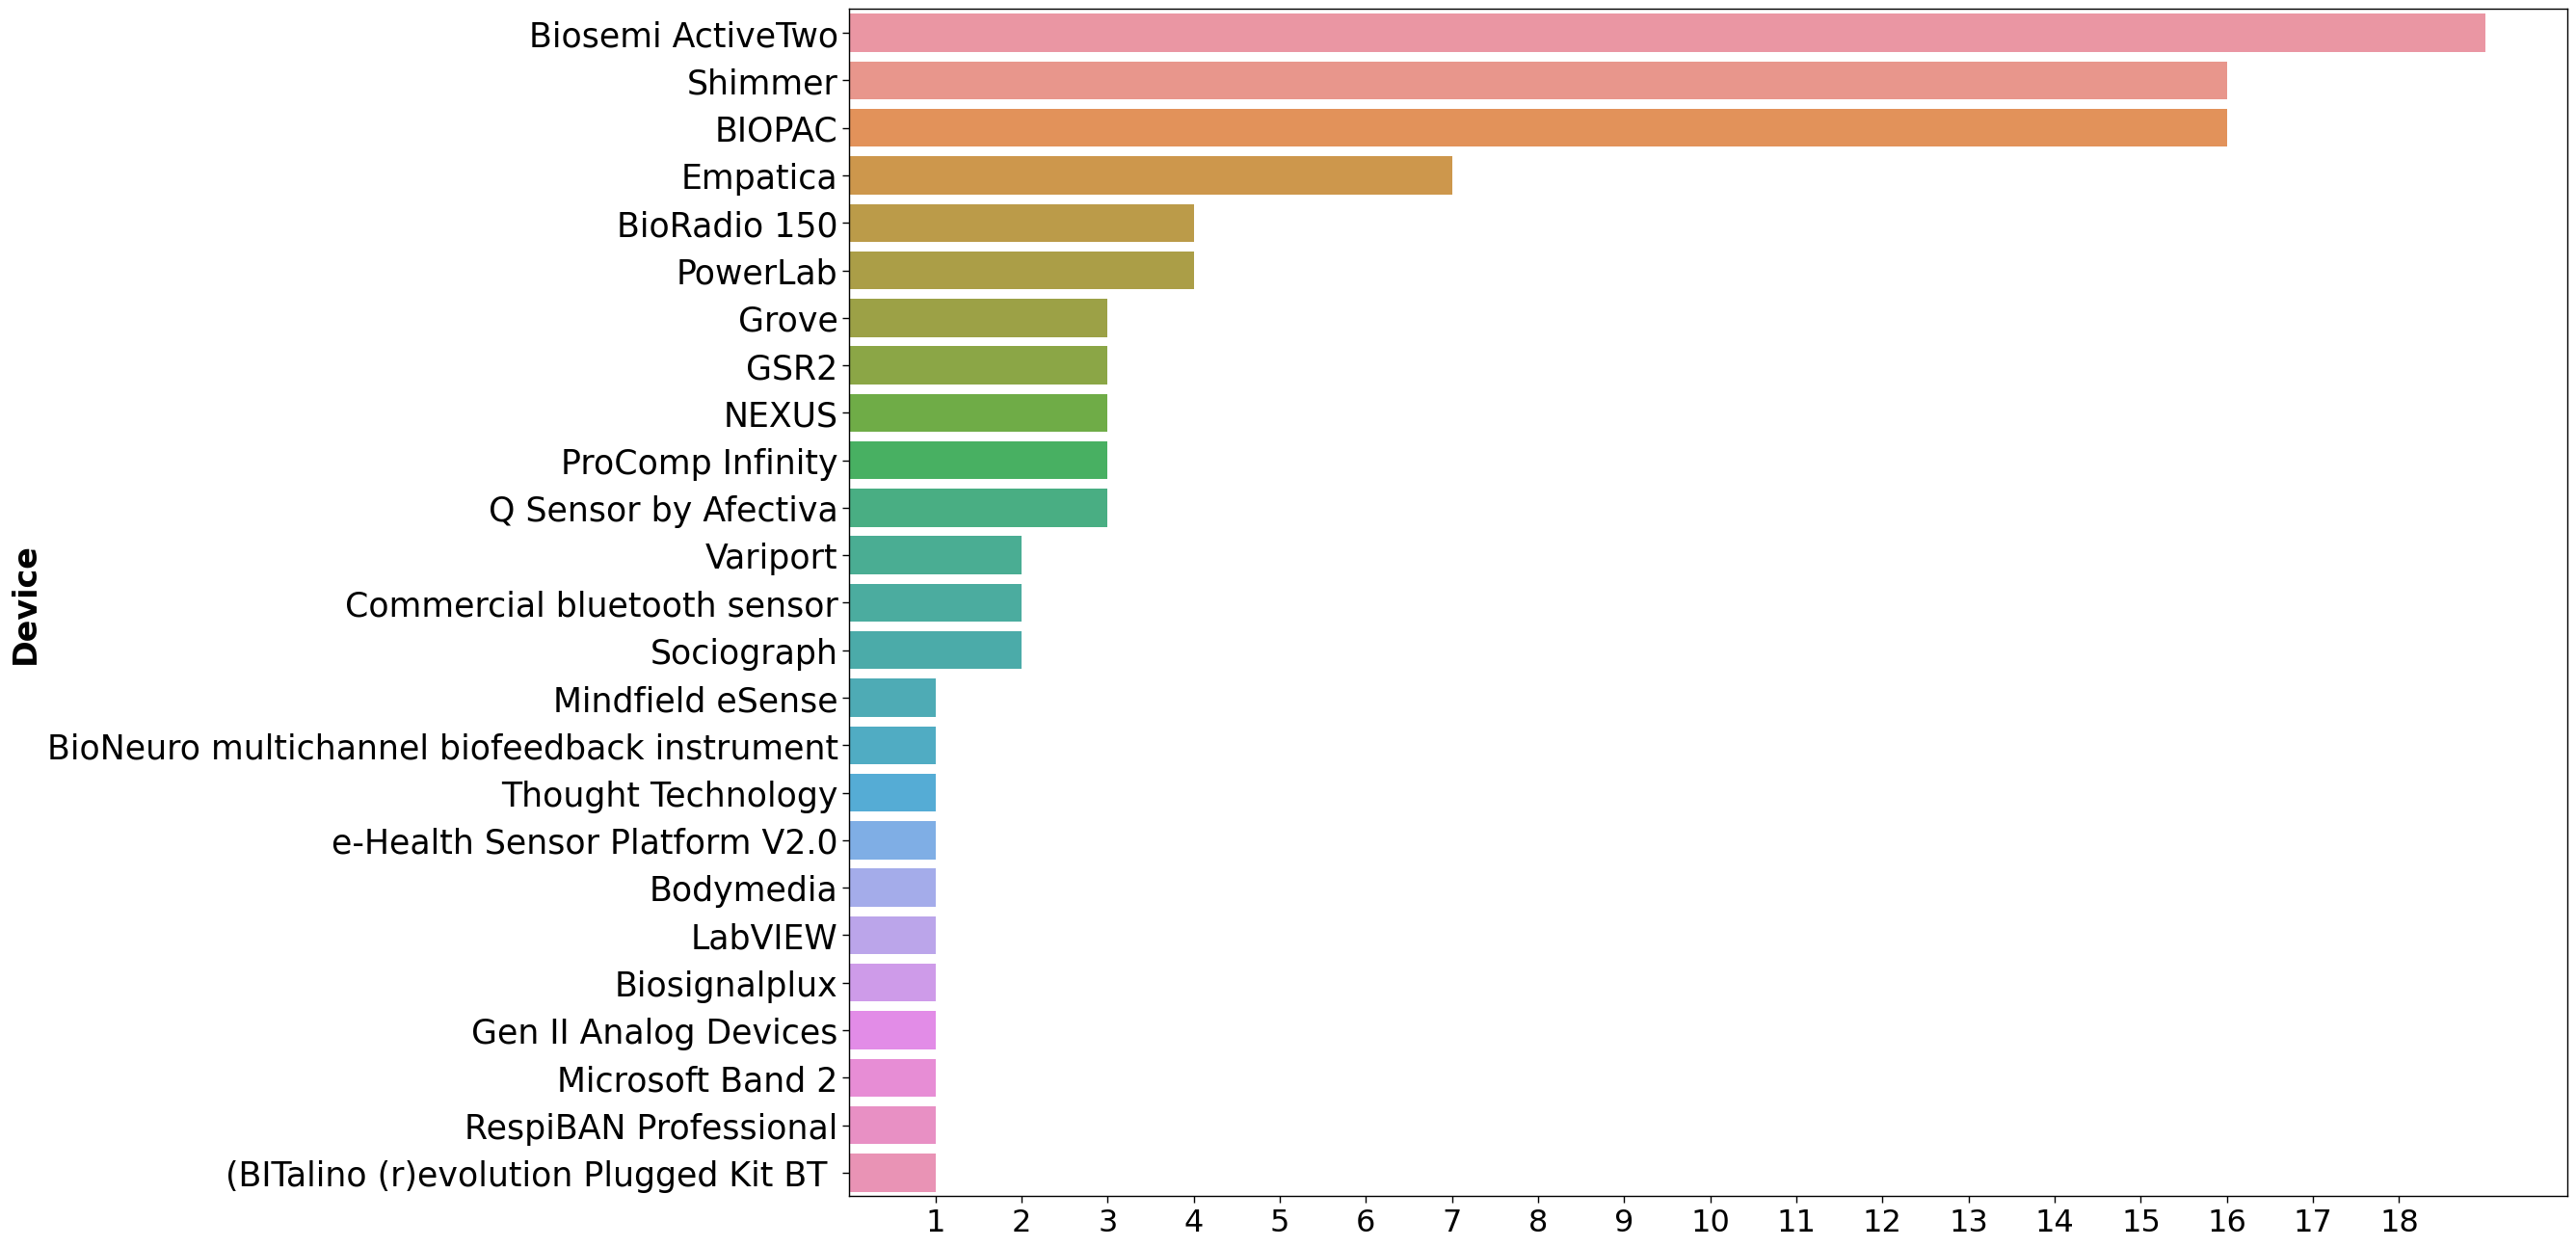

In [152]:
#Plot
from turtle import width


plt.figure(figsize = (23,16))
sns.set_context('paper')
sns.countplot(y = 'eda_device_specification',
            data = eda_devices,
            order = eda_devices['eda_device_specification'].value_counts().index)
plt.ylabel('Device',
            fontsize = 24,
            fontweight = 'bold')
plt.xlabel('')
plt.yticks(fontsize = 25)
plt.xticks(ticks = range(1,19), fontsize = 23)
plt.show()

In [153]:
#Aquellos que tenian una frecuencia de 4 o menos los agrupamos en 'Others'
mapping_others ={
        
        'Mindfield eSense': 'Others (<1)',
        'BioNeuro multichannel biofeedback instrument': 'Others (<1)',
        'Thought Technology': 'Others (<1)',
        'e-Health Sensor Platform V2.0': 'Others (<1)',
        'Bodymedia': 'Others (<1)',
        'LabVIEW': 'Others (<1)',
        'Biosignalplux': 'Others (<1)',
        'Gen II Analog Devices': 'Others (<1)',
        'Microsoft Band 2': 'Others (<1)',
        'RespiBAN Professional': 'Others (<1)',
        '(BITalino (r)evolution Plugged Kit BT ': 'Others (<1)'}

devices_with_others = eda_devices.copy()

devices_with_others.loc[:,'eda_device_specification'] = devices_with_others.loc[:,'eda_device_specification'].replace(mapping_others)
devices_with_others['eda_device_specification'].value_counts()

Biosemi ActiveTwo              19
Shimmer                        16
BIOPAC                         16
Others (<1)                    11
Empatica                        7
BioRadio 150                    4
PowerLab                        4
Q Sensor by Afectiva            3
Grove                           3
NEXUS                           3
ProComp Infinity                3
GSR2                            3
Sociograph                      2
Commercial bluetooth sensor     2
Variport                        2
Name: eda_device_specification, dtype: int64

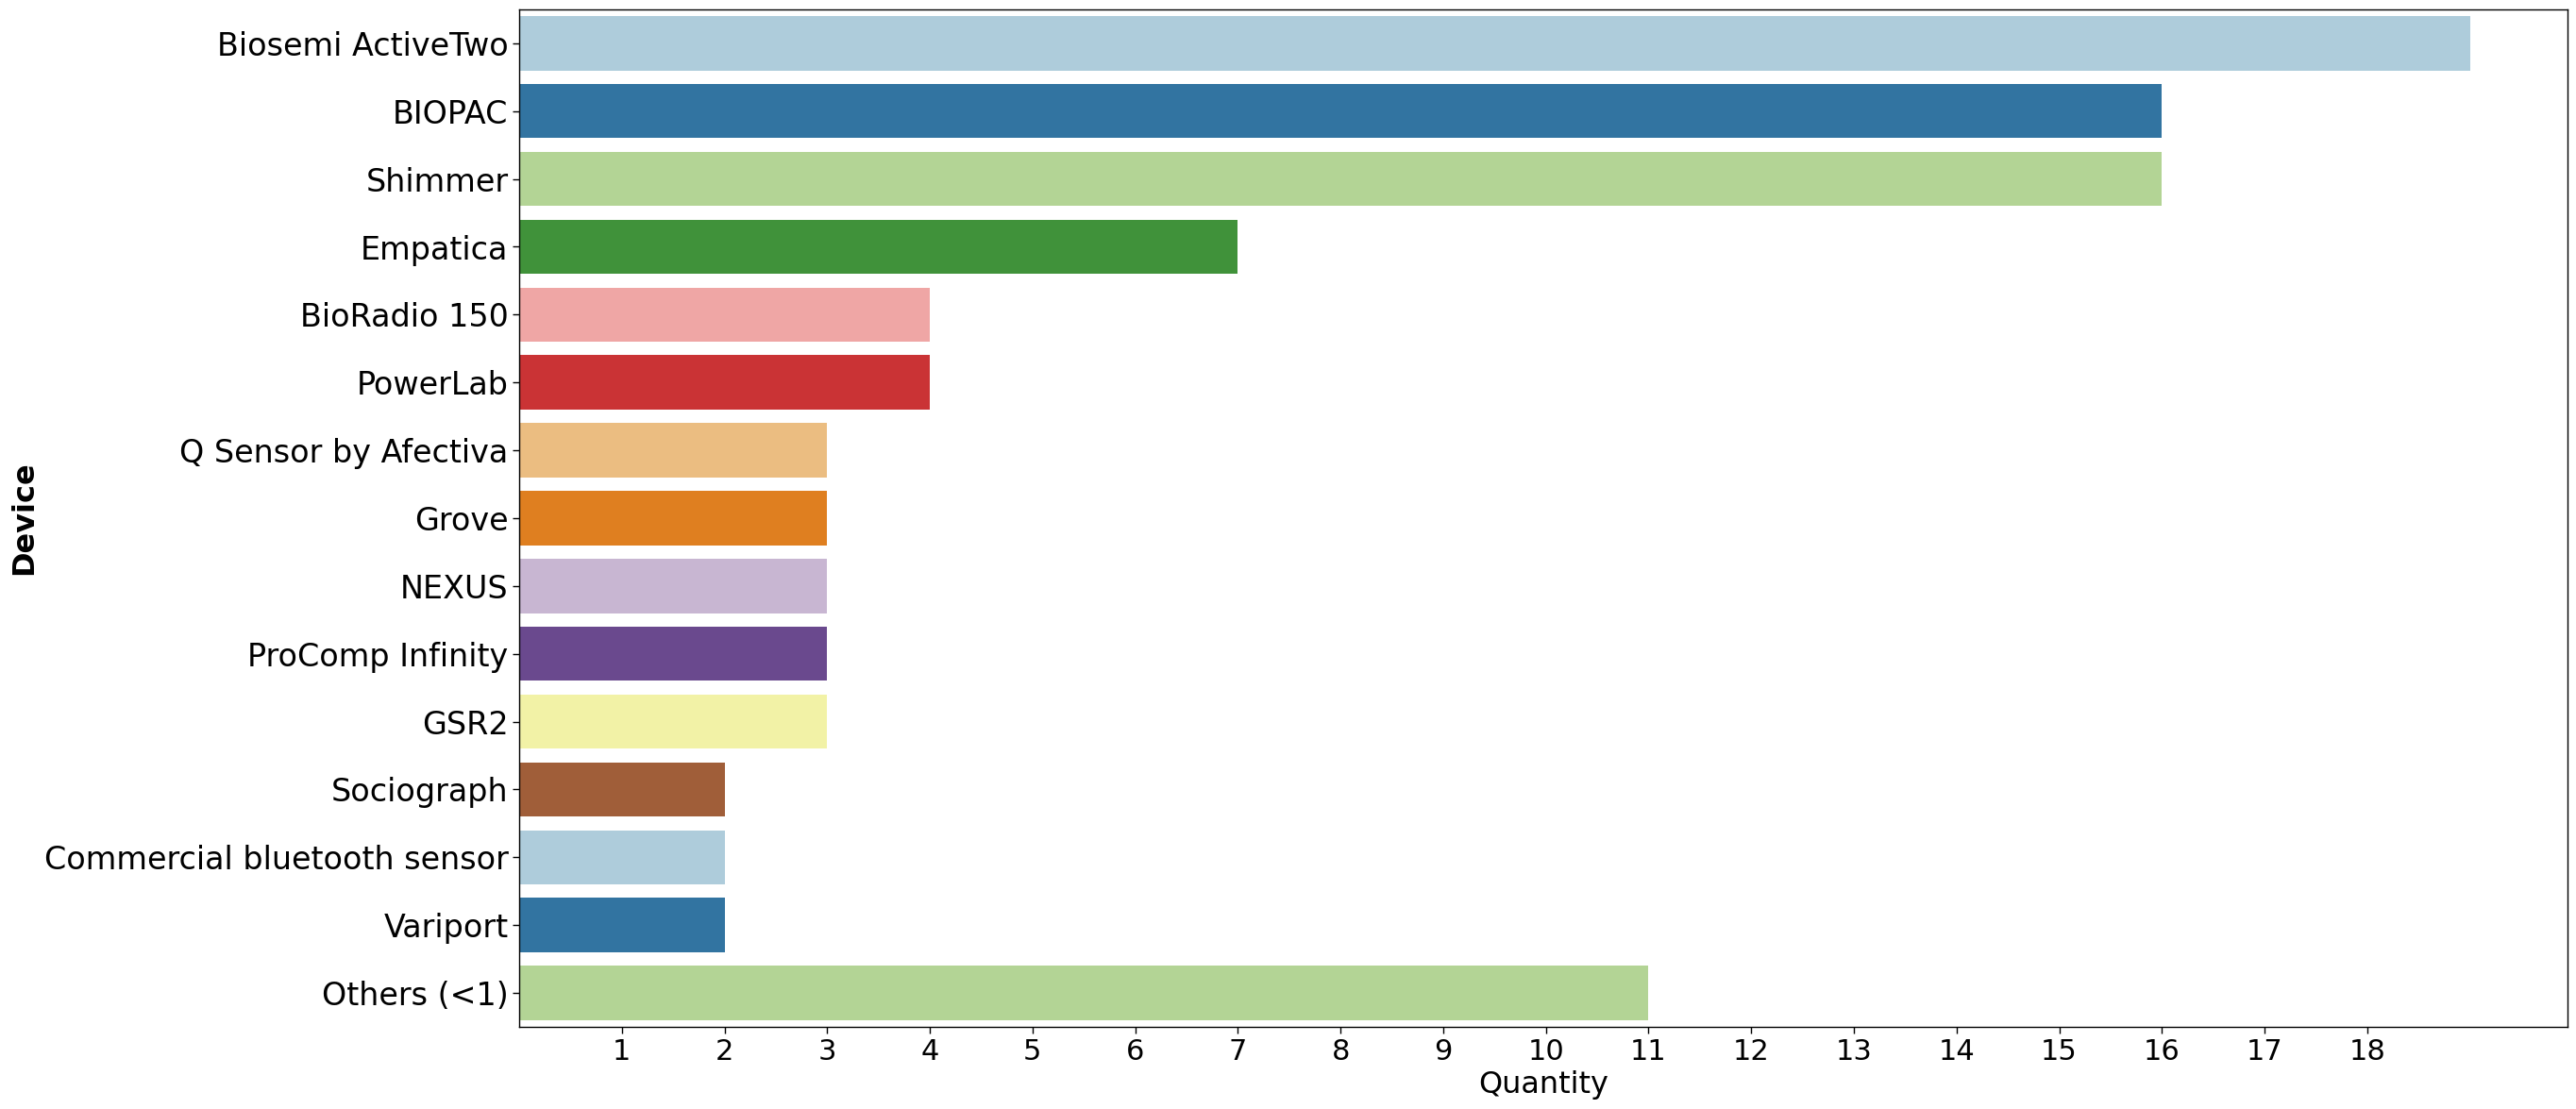

In [154]:
#Orden
plot_order = ['Biosemi ActiveTwo','BIOPAC', 'Shimmer', 'Empatica','BioRadio 150', 'PowerLab', 'Q Sensor by Afectiva' , 'Grove','NEXUS','ProComp Infinity', 'GSR2','Sociograph', 'Commercial bluetooth sensor', 'Variport', 'Others (<1)']

#Plot
plt.figure(figsize = (28,14))
sns.set_context('paper')
sns.countplot(y = 'eda_device_specification',
            data = devices_with_others,
            order = plot_order,
            palette = "Paired")
plt.ylabel('Device', fontsize = 23,fontweight = 'bold')
plt.xlabel('Quantity', fontsize = 23)
plt.yticks(fontsize = 24)
plt.xticks(ticks = range(1,19), fontsize = 22)
plt.show()

In [155]:
devices_with_others["eda_device_specification"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Biosemi ActiveTwo              19.4%
Shimmer                        16.3%
BIOPAC                         16.3%
Others (<1)                    11.2%
Empatica                        7.1%
BioRadio 150                    4.1%
PowerLab                        4.1%
Q Sensor by Afectiva            3.1%
Grove                           3.1%
NEXUS                           3.1%
ProComp Infinity                3.1%
GSR2                            3.1%
Sociograph                      2.0%
Commercial bluetooth sensor     2.0%
Variport                        2.0%
Name: eda_device_specification, dtype: object

In [156]:
df_eda['location_hemibody'] = df_eda['location_hemibody'].replace({'non-dominant': 'not dominant'})

In [157]:
hemibody = df_eda.groupby(['paper_id', 'location_hemibody']).nth(0)
hemibody.reset_index(inplace=True)
hemibody['location_hemibody'].value_counts()

-               65
left            23
not dominant    10
right            3
dominant         1
Name: location_hemibody, dtype: int64

In [158]:
sum(hemibody['location_hemibody'].value_counts())

102

In [159]:
hemibody['location_hemibody'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

-               63.7%
left            22.5%
not dominant     9.8%
right            2.9%
dominant         1.0%
Name: location_hemibody, dtype: object

In [160]:
hemibody_only_reported = hemibody[hemibody['location_hemibody'] != "-"]
hemibody_only_reported['location_hemibody'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

left            62.2%
not dominant    27.0%
right            8.1%
dominant         2.7%
Name: location_hemibody, dtype: object

In [161]:
sensors = df_eda.groupby(['paper_id','is_hands','wrist', 'chest', 'left_lobe_temporalis',
                    'finger_thumb', 'finger_index', 'finger_mIddle', 'finger_ring', 'finger_little',
                     'phalange_proximal', 'phalange_medial','phalange_distal',
                     ]).nth(0)
sensors.reset_index(inplace= True)

In [162]:
sensors_location = df_eda.groupby(['paper_id','is_hands','wrist', 'chest', 'left_lobe_temporalis']).nth(0)
sensors_location.reset_index(inplace = True)

PAPERS WITH NO DATA RELATED TO SENSORS LOCATION

In [163]:
len(sensors[(sensors['is_hands'] == '-') &
            (sensors['wrist'] == '-') &
            (sensors['chest'] == '-') &
            (sensors['left_lobe_temporalis'] == '-')])

27

In [164]:
general_place = fn.multi_reversing(sensors, 'model_id',sensors[['is_hands','wrist', 'chest', 'left_lobe_temporalis']])
general_place['variable'].value_counts()

is_hands    68
wrist       13
chest        1
Name: variable, dtype: int64

In [165]:
general_place['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

is_hands    82.9%
wrist       15.9%
chest        1.2%
Name: variable, dtype: object

In [166]:
finger_sensor = fn.multi_reversing(sensors, 'model_id',sensors[['finger_thumb', 'finger_index', 'finger_mIddle', 'finger_ring', 'finger_little']])
finger_sensor['variable'].value_counts()

finger_mIddle    52
finger_index     43
finger_ring      22
finger_little     2
finger_thumb      1
Name: variable, dtype: int64

In [167]:
finger_sensor['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

finger_mIddle    43.3%
finger_index     35.8%
finger_ring      18.3%
finger_little     1.7%
finger_thumb      0.8%
Name: variable, dtype: object

In [168]:
location_phalanges = fn.multi_reversing(sensors, 'model_id',sensors[['phalange_proximal', 'phalange_medial','phalange_distal']])
location_phalanges['variable'].value_counts()

phalange_distal      21
phalange_medial      11
phalange_proximal     2
Name: variable, dtype: int64

In [169]:
finger_sensor['variable'].value_counts()

finger_mIddle    52
finger_index     43
finger_ring      22
finger_little     2
finger_thumb      1
Name: variable, dtype: int64

In [170]:
finger_sensor['variable'] = finger_sensor['variable'].str.replace('finger_mIddle','Middle')
finger_sensor['variable'] = finger_sensor['variable'].str.replace('finger_index','Index')
finger_sensor['variable'] = finger_sensor['variable'].str.replace('finger_ring','Ring')
finger_sensor['variable'] = finger_sensor['variable'].str.replace('finger_thumb','Thumb')
finger_sensor['variable'] = finger_sensor['variable'].str.replace('finger_little','Little')

C:\Users\someo\AppData\Local\Temp\ipykernel_112240\3515212279.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels())
C:\Users\someo\AppData\Local\Temp\ipykernel_112240\3515212279.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels())
C:\Users\someo\AppData\Local\Temp\ipykernel_112240\3515212279.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax3.get_yticklabels())


"ax1.legend(title='Modelo afectivo', loc='upper left')\nax2.legend(title='Tipo de algoritmo', loc='upper left')"

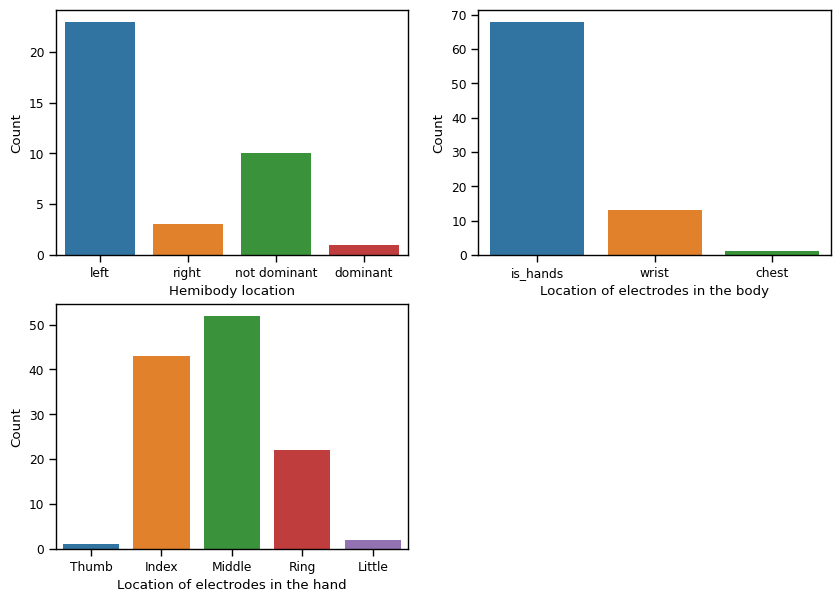

In [171]:
fig, axes = plt.subplots(2, 2)

fig.set_figheight(7)
fig.set_figwidth(10)
plot_order = ['left', 'right', 'not dominant', 'dominant']
ax1 = sns.countplot(x = 'location_hemibody',
    data = hemibody,
    order = plot_order,
    ax=axes[0,0])

ax2 = sns.countplot(x = 'variable', data = general_place,
    ax=axes[0,1])

ax3 = sns.countplot(x = 'variable', data = finger_sensor,
    ax=axes[1,0])

fig.delaxes(axes[1,1])

"""ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])"""

ax1.set_yticklabels(ax1.get_yticklabels())
ax2.set_yticklabels(ax2.get_yticklabels())
ax3.set_yticklabels(ax3.get_yticklabels())
ax1.set_xticklabels(ax1.get_xticklabels())
ax2.set_xticklabels(ax2.get_xticklabels())
ax3.set_xticklabels(ax3.get_xticklabels())

ax1.set_xlabel("Hemibody location")
ax1.set_ylabel("Count")
ax2.set_xlabel("Location of electrodes in the body")
ax2.set_ylabel("Count")
ax3.set_xlabel("Location of electrodes in the hand")
ax3.set_ylabel("Count")

"""ax1.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de modelo emocional")
ax2.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de algoritmo")"""

"""ax1.legend(title='Modelo afectivo', loc='upper left')
ax2.legend(title='Tipo de algoritmo', loc='upper left')"""

### 7. Statistical learning models

In [172]:
df_statistical_learning_models = df_alg_perf.fillna('-')

#### 7.1. Affective models

[Text(0.5, 0, 'Año'), Text(0, 0.5, 'Cantidad de papers')]

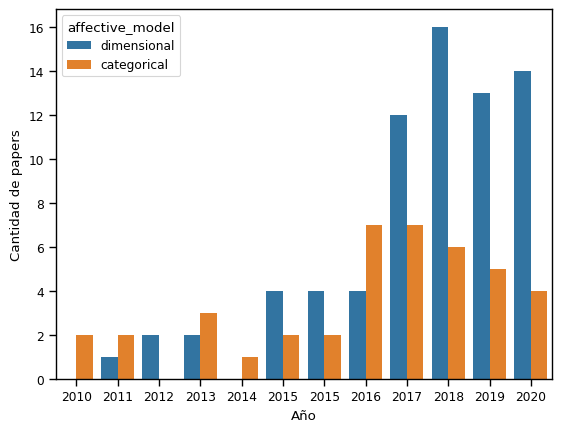

In [173]:
#rellenar datos faltantes y NO SE DROPEAN los duplicados (hay papers que usan multiples modelos)
df_statistical_learning_models=df_statistical_learning_models[df_statistical_learning_models['affective_model'].isin(['categorical', 'dimensional'])]
df_statistical_learning_models_0 = df_statistical_learning_models.groupby(['paper_id','affective_model']).nth(0)
df_statistical_learning_models_0.reset_index(inplace=True)

#ploteo
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g= sns.countplot(x='year', 
    data= df_statistical_learning_models_0, 
    hue='affective_model', 
    order=category_order)
g.set(xlabel = 'Año', ylabel = 'Cantidad de papers')

In [174]:
df_statistical_learning_models_0["year"] = df_statistical_learning_models_0["year"].astype(int)
df_statistical_learning_models_0

,paper_id,affective_model,model_id,apa_citation,year,is_classifier,class_model_output_number,class_model_output_categories,class_logistic_regression,class_support_vector_machine,...,mean_absolute_error,concordance_correlation_coefficient,spearmans_ranking_correlation,mean_square_error,root_mean_square_error,pearson_correlation_coefficient,unweighted_average_recall,matthews_correlation_coefficient,geometric_mean,model
0,1,dimensional,1,"Zangróniz, R., Martínez-Rodrigo, A., Pastor, J...",2017,x,2,"calm, distress",-,-,...,-,-,-,-,-,-,-,-,-,classifier
1,2,categorical,2,"Liu, M., Fan, D., Zhang, X., & Gong, X. (2017)...",2016,x,5,"Happiness, Grief, Fear, Anger, Calm",-,x,...,-,-,-,-,-,-,-,-,-,classifier
2,3,dimensional,3,"Ayata, D., Yaslan, Y., & Kamasak, M. E. (2018)...",2018,x,2,"LA, HA",-,-,...,-,-,-,-,-,-,-,-,-,classifier
3,4,dimensional,5,"Ali, M., Machot, F. A., Mosa, A. H., Jdeed, M....",2018,x,4,"HAHV, HALV, LAHV, LALV",-,-,...,-,-,-,-,-,-,-,-,-,classifier
4,5,categorical,11,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",2016,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,regressor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,95,dimensional,482,"Yang, H. C., & Lee, C. C. (2019, September). A...",2020,x,2,"HA, LA",-,x,...,-,-,-,-,-,-,0.566,-,-,classifier
103,96,dimensional,492,"Kołodziej, M., Tarnowski, P., Majkowski, A., &...",2020,x,2,"HA, LA",-,x,...,-,-,-,-,-,-,-,-,-,classifier
104,97,dimensional,493,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,x,2,"HA, LA",-,-,...,-,-,-,-,-,-,-,-,-,classifier
105,98,dimensional,495,"Subramanian, R., Wache, J., Abadi, M. K., Vier...",2018,x,2,"HV, LV",-,x,...,-,-,-,-,-,-,-,-,-,classifier


#### ¿Cual es la evolucion temporal (2010-2020) del uso de los modelos de regresion y categoriales empleados?
Cantidad de modelos de regresion o categorial por anio

2. Hacer un plot de la progresión de modelos de regresión vs clasificación de 2010 a 2020. Este plot deberia ser igual al plot que ve la progresion de modelos dimensioanles vs categoriales. La idea con este plot seria analizar sin la progresion de papers basados en modelos dimensioanels se acompaña con modelso estadísticos de regresion (que es lo que se esperaria dado el tipo de variable, pero asumimos que no sucede)

In [175]:
df_statistical_learning_models=df_statistical_learning_models.fillna('-')

In [176]:
df_statistical_learning_models["is_regressor"].value_counts()

-    448
x     51
Name: is_regressor, dtype: int64

In [177]:
def label_model (row):
   if row['is_classifier'] == "x" :
      return 'classifier'
   if row['is_regressor'] == "x" :
      return 'regressor'
   return 'Other'

In [178]:
df_statistical_learning_models['model']  = df_statistical_learning_models.apply(lambda row: label_model(row), axis=1)

In [179]:
df_statistical_learning_models['model'].value_counts()

classifier    448
regressor      51
Name: model, dtype: int64

In [180]:
df_models = df_statistical_learning_models[["apa_citation",'model', "year", "model_id"]]

[Text(0.5, 0, 'Año'), Text(0, 0.5, 'Cantidad de modelos')]

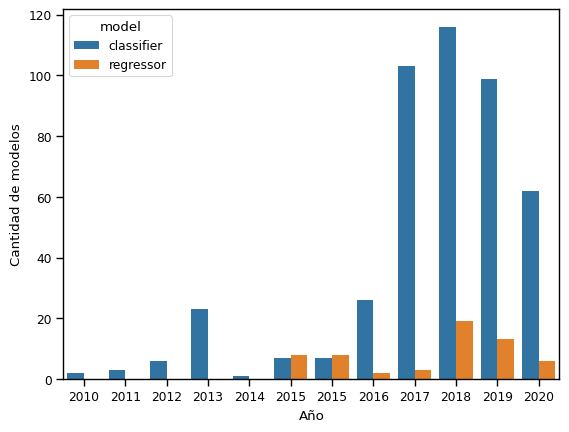

In [182]:
#ploteo
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
g= sns.countplot(x='year', 
    data= df_models, 
    hue='model', 
    order=category_order)
g.set(xlabel = 'Año', ylabel = 'Cantidad de modelos')

#### ¿Cual es la frecuencia del uso de modelos algoritmicos de regresion y clasificacion?
3. Gráficos frencuencia de los modelos algoritimicos, según modelos de regresión y clasificación

- Interpretaciones: Los algoritmos clasificadores son por mucho los mas usados, ademas de ser los que mas variedad representan. Que implica esto? Es lo mismo aplicar algoritmos clasificadores o regresores?
- Nota: ordenar los valores de los gráficos y unirlos en uno, buscar graficar los mas usados (primeros 5 o 10) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'decision_tree'),
  Text(1, 0, 'linear_regression'),
  Text(2, 0, 'support_vector_regression'),
  Text(3, 0, 'knn'),
  Text(4, 0, 'convolutional_neuronal_network'),
  Text(5, 0, 'recurrent_neuronal_network'),
  Text(6, 0, 'fully_connected_neuronal_network_or_multi_layer_perceptron'),
  Text(7, 0, 'ridge_regression'),
  Text(8, 0, 'logistic_regression'),
  Text(9, 0, 'multilayer_regression'),
  Text(10, 0, 'boosted_regression_trees'),
  Text(11, 0, 'polynomial_regression')])

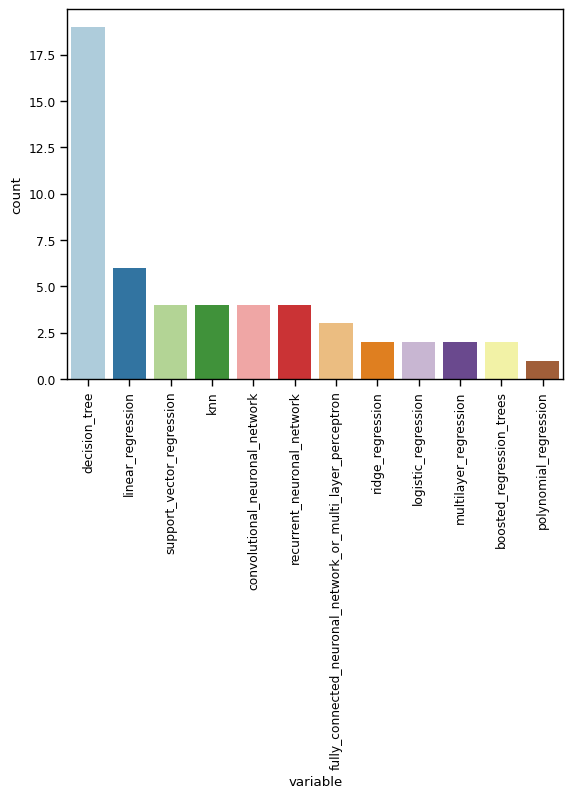

In [207]:
#para regressor
df_algoritmos_regre = fn.multi_reversing(df_statistical_learning_models, 'model_id', df_statistical_learning_models.iloc[:,43:57])
df_algoritmos_regre['variable'] = df_algoritmos_regre['variable'].str.replace('regre_','')

sns.countplot(x='variable', data=df_algoritmos_regre, order = getattr(df_algoritmos_regre, 'variable').value_counts().index, palette="Paired")
plt.xticks(rotation=90)

C:\Users\someo\Downloads\review-emotion-recognition-eda\scripts\functions.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


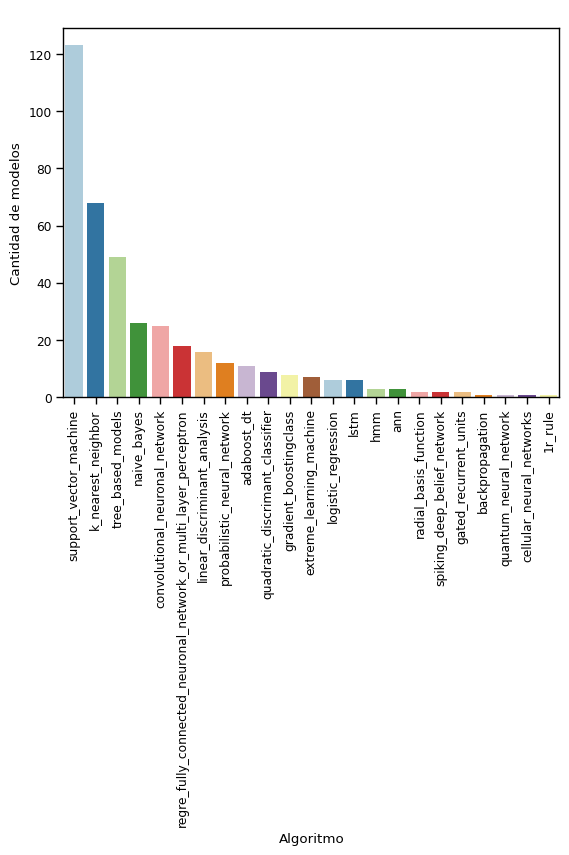

In [184]:
#para classifier

df_algoritmos_class = fn.multi_reversing(df_statistical_learning_models, 'model_id', df_statistical_learning_models.iloc[:,8:40])
df_algoritmos_class['variable'] = df_algoritmos_class['variable'].str.replace('class_','')

#Lista de algoritmos unicos de clasificacion
algoritmos_de_clasificacion = df_algoritmos_class["variable"].unique()
#print(algoritmos_de_clasificacion)

titulos = [' ', 'Algoritmo', 'Cantidad de modelos']
fn.bar_plot('variable',df_algoritmos_class,titulos)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'support_vector_machine'),
  Text(1, 0, 'k_nearest_neighbor'),
  Text(2, 0, 'tree_based_models'),
  Text(3, 0, 'convolutional_neuronal_network'),
  Text(4, 0, 'naive_bayes'),
  Text(5, 0, 'fully_connected_neuronal_network_or_multi_layer_perceptron'),
  Text(6, 0, 'decision_tree'),
  Text(7, 0, 'linear_discriminant_analysis'),
  Text(8, 0, 'probabilistic_neural_network'),
  Text(9, 0, 'adaboost_dt'),
  Text(10, 0, 'quadratic_discrimant_classifier'),
  Text(11, 0, 'logistic_regression'),
  Text(12, 0, 'gradient_boostingclass'),
  Text(13, 0, 'extreme_learning_machine'),
  Text(14, 0, 'lstm'),
  Text(15, 0, 'linear_regression'),
  Text(16, 0, 'knn'),
  Text(17, 0, 'support_vector_regression'),
  Text(18, 0, 'recurrent_neuronal_network'),
  Text(19, 0, 'ann'),
  Text(20, 0, 'hmm'),
  Text(21, 0, 'spiking_deep_belief_network'),
  Text

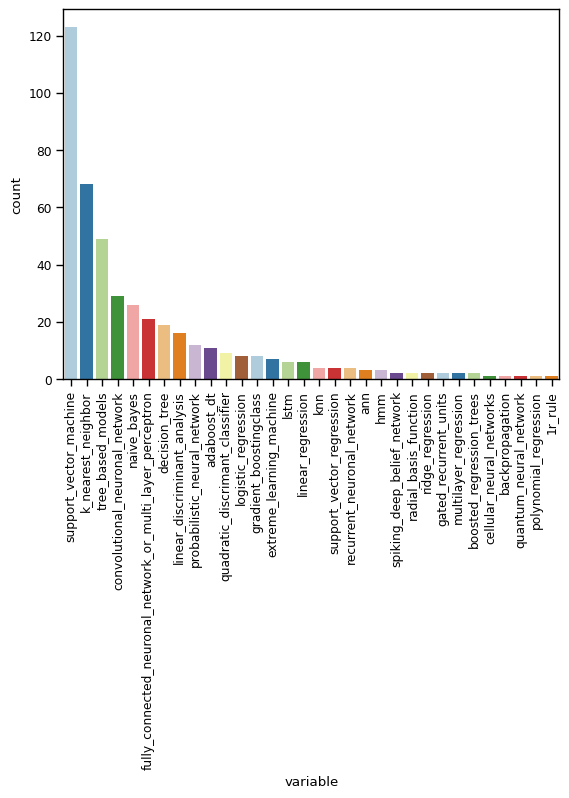

In [209]:
df_all_models = df_statistical_learning_models.iloc[:,1:57]
df_all_models.drop(df_all_models.columns[[1,2,3,4,5,6,39,40,41]], axis=1, inplace=True)

df_all_models = fn.multi_reversing(df_all_models, 'model_id', df_all_models.iloc[:,1:])
df_all_models['variable'] = df_all_models['variable'].str.replace('class_','')
df_all_models['variable'] = df_all_models['variable'].str.replace('regre_','')

sns.countplot(x='variable', data=df_all_models, order = getattr(df_all_models, 'variable').value_counts().index, palette="Paired")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'support_vector_machine'),
  Text(1, 0, 'k_nearest_neighbor'),
  Text(2, 0, 'tree_based_models'),
  Text(3, 0, 'convolutional_neuronal_network'),
  Text(4, 0, 'naive_bayes'),
  Text(5, 0, 'fully_connected_neuronal_network_or_multi_layer_perceptron'),
  Text(6, 0, 'decision_tree'),
  Text(7, 0, 'linear_discriminant_analysis'),
  Text(8, 0, 'probabilistic_neural_network'),
  Text(9, 0, 'adaboost_dt')])

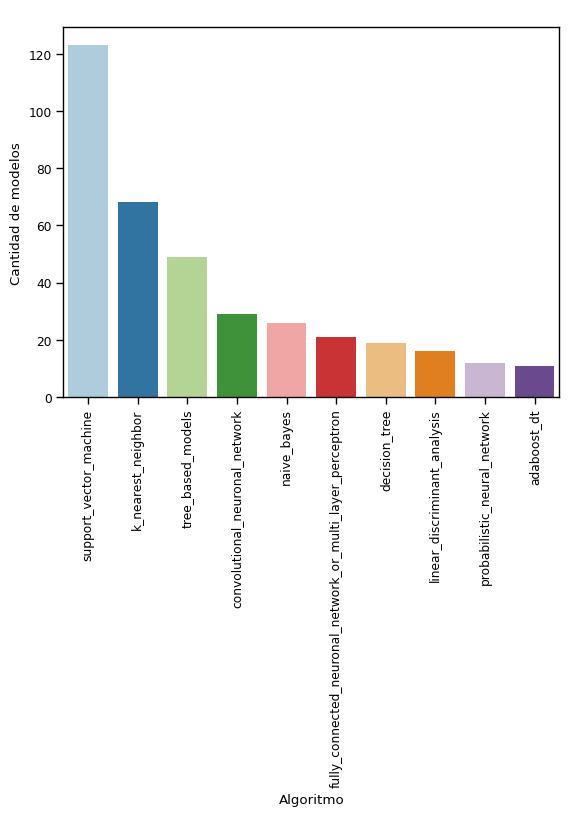

In [186]:
vc = df_all_models['variable'].value_counts()
vc = vc.iloc[:10]
df_dv = vc.to_frame()
df_dv = df_dv.reset_index()
df_dv.rename(columns = {'index':'algoritmo', 'variable':'cantidad'}, inplace = True)

titulos = [' ', 'Algoritmo', 'Cantidad de modelos']
g = sns.barplot(data=df_dv, x='algoritmo', y='cantidad', palette="Paired")
g.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])
plt.xticks(rotation=90)

### 8. Algorithms and performances

#### Proporción de trabajos por año (2010 - 2020) segun tipo de modelo emocional y tipo de algoritmo

In [187]:
df_models = df_statistical_learning_models[["paper_id","apa_citation",'model', "year", "model_id"]]

df_models = df_models.groupby(
        ["paper_id",'model']
        ).nth(0)
df_models.reset_index(inplace=True)

In [188]:
"""df_statistical_learning_models['affective_model'] = df_statistical_learning_models['affective_model'].str.replace('categorical','categorial')"""

"df_statistical_learning_models['affective_model'] = df_statistical_learning_models['affective_model'].str.replace('categorical','categorial')"

In [189]:
models = df_statistical_learning_models[["paper_id", "year", "affective_model", "model_id"]]

models = models.groupby(
        ["paper_id",'affective_model']
        ).nth(0)
models.reset_index(inplace=True)

models["year"] = models["year"].astype(int)

In [190]:
models["affective_model"].value_counts()

dimensional    68
categorical    39
Name: affective_model, dtype: int64

In [191]:
models_crosstab = pd.crosstab(index=models['year'], columns=models['affective_model'],normalize='index')

In [192]:
"""df_models['model'] = df_models['model'].str.replace('classifier','clasificación')
df_models['model'] = df_models['model'].str.replace('regressor','regresión')"""

"df_models['model'] = df_models['model'].str.replace('classifier','clasificación')\ndf_models['model'] = df_models['model'].str.replace('regressor','regresión')"

In [193]:
n_models = df_models.groupby(
        ["paper_id",'model']
        ).nth(0)
n_models.reset_index(inplace=True)

n_models["year"] = n_models["year"].astype(int)

In [194]:
n_models_crosstab = pd.crosstab(index=n_models['year'], columns=n_models['model'],normalize='index')

C:\Users\someo\AppData\Local\Temp\ipykernel_112240\3573763391.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels())
C:\Users\someo\AppData\Local\Temp\ipykernel_112240\3573763391.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels())


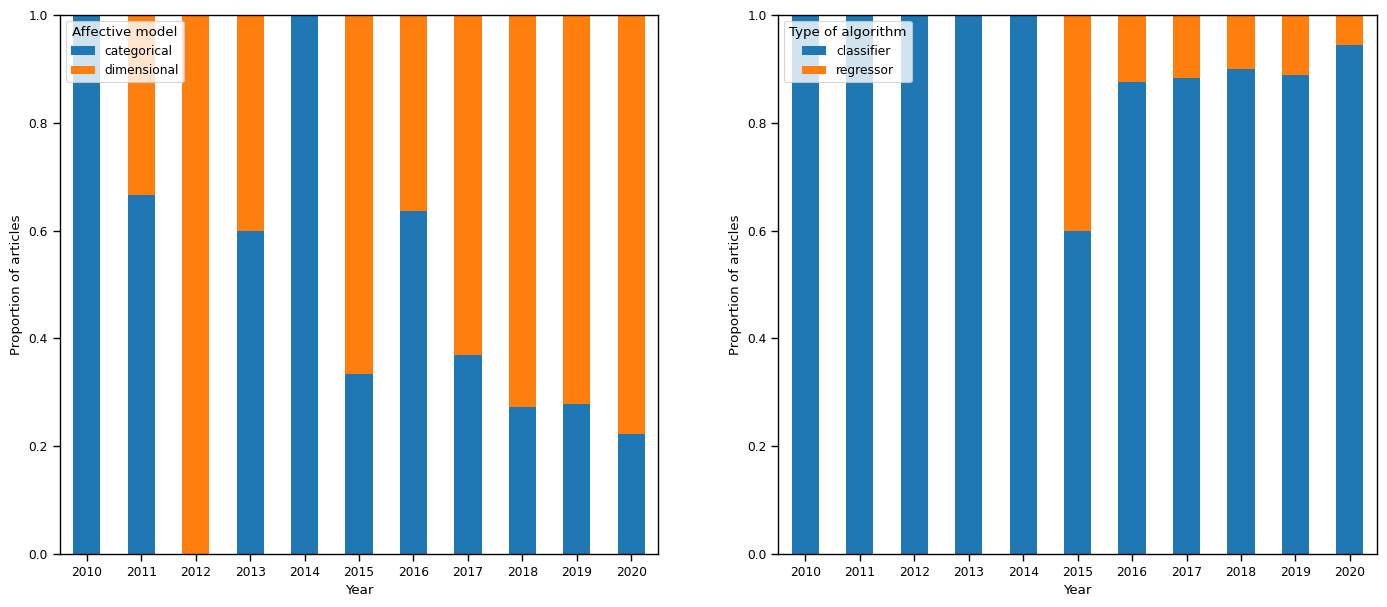

In [195]:
fig, axes = plt.subplots(1, 2)

fig.set_figheight(7)
fig.set_figwidth(17)

ax1 = models_crosstab.plot(kind='bar', 
    stacked=True,
    rot=0,
    ax=axes[0])

ax2 = n_models_crosstab.plot(kind='bar', 
    stacked=True,
    rot=0,
    ax=axes[1])

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])

ax1.set_yticklabels(ax1.get_yticklabels())
ax2.set_yticklabels(ax2.get_yticklabels())
ax1.set_xticklabels(ax1.get_xticklabels())
ax2.set_xticklabels(ax2.get_xticklabels())

ax1.set_xlabel("Year")
ax1.set_ylabel("Proportion of articles")
ax2.set_xlabel("Year")
ax2.set_ylabel("Proportion of articles")

"""ax1.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de modelo emocional")
ax2.set_title("Proporción de trabajos por año (2010 - 2020) segun tipo de algoritmo")"""

ax1.legend(title='Affective model', loc='upper left')
ax2.legend(title='Type of algorithm', loc='upper left')

#### Interpretation

In [196]:
data_interpretation_model = pd.read_csv('.\data\cleaned\\Normalized Table - Statistical Learning model - Performances.csv')
data_interpretation_model= data_interpretation_model.fillna('-')
model_interpretion = data_interpretation_model[data_interpretation_model['model_interpretation'] !='-']
model_interpretation = model_interpretion.groupby(['paper_id', 'model_interpretation']).nth(0)

In [197]:
model_interpretation.reset_index(inplace= True)
model_interpretation.drop_duplicates(subset = ['paper_id'],inplace=True)
model_interpretation

,paper_id,model_interpretation,model_id,apa_citation,year,affective_model,is_classifier,class_model_output_number,class_model_output_categories,class_logistic_regression,...,r,mean_absolute_error,concordance_correlation_coefficient,spearmans_ranking_correlation,mean_square_error,root_mean_square_error,pearson_correlation_coefficient,unweighted_average_recall,matthews_correlation_coefficient,geometric_mean
0,5,"By using the gradient fields (see Fig. 6(c,d))...",10,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",2016,dimensional,-,-,-,-,...,0.96,-,-,-,-,-,-,-,-,-
1,12,Figure 6 shows similar EDA signal behaviour du...,47,"Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...",2018,categorical,x,2,"neutral, stress",-,...,-,-,-,-,-,-,-,-,-,-
2,17,"After preprocessing and windowing the signals,...",95,"Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...",2017,categorical,x,2,"happiness, rest",-,...,-,-,-,-,-,-,-,-,-,-
3,19,The relationship between visual descriptors an...,129,"Hernández-García, A., Fernández-Martínez, F., ...",2017,dimensional,-,-,-,-,...,-,0.93,-,-,-,-,-,-,-,-
4,21,Physiological measures in the real world are m...,132,"Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...",2017,dimensional,x,5,"HAHV, HALV, LAHV, LALV, neutral",-,...,-,-,-,-,-,-,-,-,-,-
5,29,"Furthermore, it is worth noting that quality a...",167,"Gupta, R., Abadi, M. K., Cabré, J. A. C., Morr...",2016,dimensional,x,2,"LA, HA",-,...,-,-,-,-,-,-,-,-,-,-
6,30,Poor classification accuracy may arise because...,175,"Ooi, J. S. K., Ahmad, S. A., Chong, Y. Z., Ali...",2016,categorical,x,2,"stress, anger",-,...,-,-,-,-,-,-,-,-,-,-
8,35,"Compare to some references [1], [3], [4], the ...",195,"Ferdinando, H., & Alasaarela, E. (2018). Emoti...",2018,dimensional,x,3,"calm, medium aroused, excited",-,...,-,-,-,-,-,-,-,-,-,-
9,43,"Electrodermal Activity. Interestingly, EDA se...",261,"Barral, O., Kosunen, I., & Jacucci, G. (2017)....",2017,categorical,x,2,"funny, not funny",-,...,-,-,-,-,-,-,-,-,-,-
10,57,"Additionally, we showed that psychological tra...",296,"Henriques, R., Paiva, A., & Antunes, C. (2013)...",2013,categorical,x,5,"empathy, expectation, positive-surprise, stres...",-,...,-,-,-,-,-,-,-,-,-,-


In [198]:
print(f' En {len(model_interpretation)} papers se realizan interpretaciones emocionales de los modelos')

 En 23 papers se realizan interpretaciones emocionales de los modelos


In [199]:
# lista papers id
model_interpretation_list = model_interpretation["paper_id"].to_list()
model_interpretation_list = [int(a) for a in model_interpretation_list]
model_interpretation_list

[5,
 12,
 17,
 19,
 21,
 29,
 30,
 35,
 43,
 57,
 60,
 61,
 64,
 65,
 75,
 77,
 78,
 82,
 85,
 88,
 92,
 95,
 96]

In [200]:
df_metadata_filtered = df_metadata[df_metadata['paper_id'].isin(model_interpretation_list)]
df_metadata_filtered.drop_duplicates("paper_id", inplace= True)
df_metadata_filtered[["paper_id", "apa_citation", "year", "source_title"]]

C:\Users\someo\AppData\Local\Temp\ipykernel_112240\3128163824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata_filtered.drop_duplicates("paper_id", inplace= True)


,paper_id,apa_citation,year,source_title
9,5,"Wei, J., Chen, T., Liu, G., & Yang, J. (2016)....",2016,Scientific Reports
46,12,"Ooi, J. S. K., Ahmad, S. A., Ishak, A. J., Min...",2018,International Journal of Medical Engineering a...
94,17,"Goshvarpour, A., Abbasi, A., Goshvarpour, A., ...",2017,"Signal, Image and Video Processing"
128,19,"Hernández-García, A., Fernández-Martínez, F., ...",2017,Proceedings - 2017 IEEE/WIC/ACM International ...
131,21,"Xu, Y., Hubener, I., Seipp, A.-K., Ohly, S., &...",2017,2017 IEEE International Conference on Pervasiv...
166,29,"Gupta, R., Abadi, M. K., Cabré, J. A. C., Morr...",2016,ICMR 2016 - Proceedings of the 2016 ACM Intern...
172,30,"Ooi, J. S. K., Ahmad, S. A., Chong, Y. Z., Ali...",2016,IECBES 2016 - IEEE-EMBS Conference on Biomedic...
194,35,"Ferdinando, H., & Alasaarela, E. (2018). Emoti...",2018,"Journal of Telecommunication, Electronic and C..."
260,43,"Barral, O., Kosunen, I., & Jacucci, G. (2017)....",2017,ACM Transactions on Computer-Human Interaction
293,57,"Henriques, R., Paiva, A., & Antunes, C. (2013)...",2013,Humaine Association Conference on Affective Co...


In [201]:
list_journal_int = df_metadata_filtered["source_title"].unique()
list_journal_int = list_journal_int.tolist()
list_journal_int

['Scientific Reports',
 'International Journal of Medical Engineering and Informatics',
 'Signal, Image and Video Processing',
 'Proceedings - 2017 IEEE/WIC/ACM International Conference on Web Intelligence, WI 2017',
 '2017 IEEE International Conference on Pervasive Computing and Communications Workshops, PerCom Workshops 2017',
 'ICMR 2016 - Proceedings of the 2016 ACM International Conference on Multimedia Retrieval',
 'IECBES 2016 - IEEE-EMBS Conference on Biomedical Engineering and Sciences',
 'Journal of Telecommunication, Electronic and Computer Engineering',
 'ACM Transactions on Computer-Human Interaction',
 'Humaine Association Conference on Affective Computing and Intelligent Interaction',
 'Sensors',
 'Annual International Conference of the IEEE Engineering in Medicine and Biology Society. IEEE Engineering in Medicine and Biology Society. Annual International Conference',
 'IEEE Access',
 'Asian Conf. Affective Comput. Intell. Interaction, ACII Asia',
 'Australian Conference

C:\Users\someo\AppData\Local\Temp\ipykernel_112240\1692122345.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


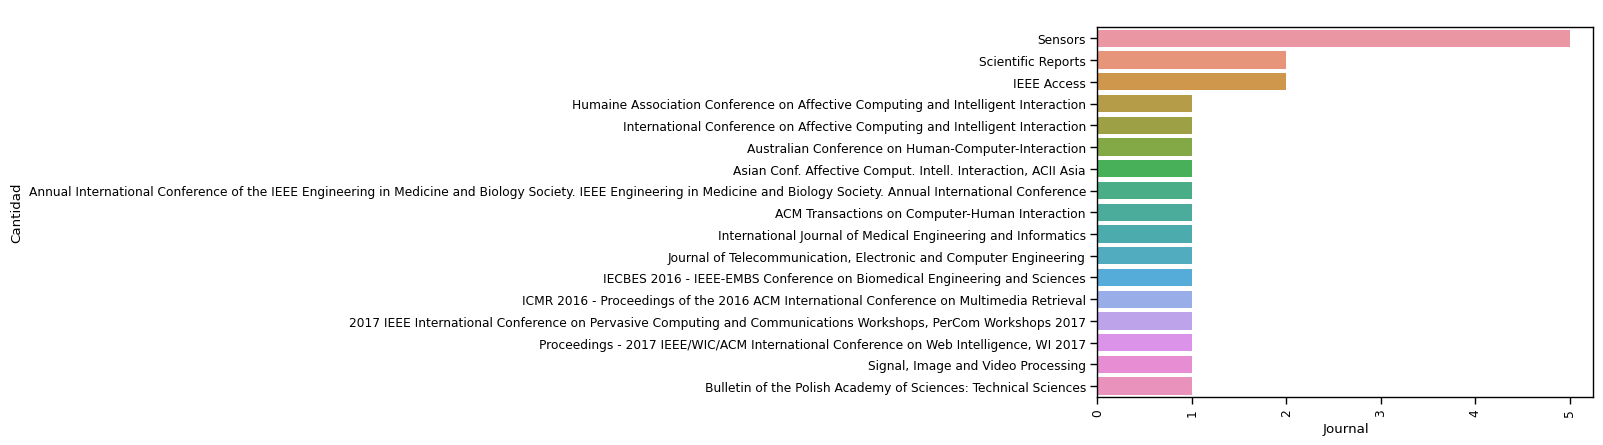

In [202]:
titulos = [' ', 'Journal', 'Cantidad']

var_x = "source_title"
df = df_metadata_filtered

g = sns.countplot(y=var_x, data=df, order = getattr(df, var_x).value_counts().index)
g.set(title = titulos[0], xlabel = titulos[1], ylabel = titulos[2])
plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()